In [1]:
# importing all the necessary libraries
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from pylab import rcParams
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression  # for linear regression
from sklearn.model_selection import train_test_split # for spliting data into train and test data
from sklearn.metrics import mean_squared_error # for checking mean sum of square errors

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression # for logistic regression
from sklearn import metrics 
from sklearn.metrics import roc_curve

import warnings 
warnings.filterwarnings('ignore')


## Problem 1 : Linear Regression

You are hired by a company named Gem Stones Co Ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of approximately 27,000 pieces of cubic zirconia (which is an inexpensive synthesized diamond alternative with similar qualities of a diamond).

Your objective is to accurately predict prices of the zircon pieces. Since the company profits at a different rate at different price levels, for revenue management, it is important that prices are predicted as accurately as possible. At the same time, it is important to understand which of the predictors are more important in determining the price.

### Problem 1.1 The very first step of any data analysis assignment is to do the exploratory data analysis (EDA). Once you have understood the nature of all the variables, identified the response and the predictors, apply appropriate methods to determine whether there is any duplicate observation or missing data and whether the variables have symmetric or skewed distribution. Note that data may contain various types of attributes and numerical and/or visual data summarization techniques need to be appropriately decided. Both univariate and bivariate analyses and pre-processing of data are important. Check for outliers and comment on removing or keeping them while model building. Since this is a regression problem, the dependence of the response on the predictors needs to be thoroughly investigated.

### Loading the Dataset

In [2]:
df = pd.read_csv('cubic_zirconia.csv')    

**Data Dictionary For Cubic Zirconia :**
1.  carat      :    Carat Weight of the cubic zirconia.
2.  cut        :    Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
3.  color      :    Colour of the cubic zirconia. With D being the best and J the worst.
4.  clarity    :    Clarity refers to the abence of the Incusions and Blemishes. (In order from Best to Worst in terms of avg. price) IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1.
5.  Depth      :    The Height of cubic zirconia, measured for the Culet to the table, divided by its average Girdle Diameter.
6.  Table      :    The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
7.  Price      :    the Price of the cubic zirconia.
8.  x          :    Length of the cubic zirconia in mm.
9.  y          :    Width of the cubic zirconia in mm.
10. z          :    Height of the cubic zirconia in mm.

#### First 5 Observations

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


#### Last 5 Observations

In [4]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


**Interpretations :**
- We observed that the very first column 'Unnamed: 0' was not of any use as the default index was already provided so, we must drop that column.


In [5]:
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


Now , as we can see, 'Unnamed:0' column has been dropped from the dataset.

### Data Descriptive Statistics

In [6]:
print('Number of rows:',df.shape[0],'\nNumber of columns:',df.shape[1])

Number of rows: 26967 
Number of columns: 10


### Check for Data Info and Data Types

In [7]:
print(df.info(),'\n')
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB
None 

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object


**Interpretations :**
- We inferred that , there null values were present in the dataset.
- As per the insights, 1 column consists of int values , while on the other hand 6 columns had float values and 3 columns had object data types values.

### Descriptive Statistics

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


**Interpretations :**
- Almost each and every column except for 'price', the mean and median between them were almost equal to each other, we indicates the very less skewness exists in their distribution.
- 'Price' ranges from minimum of 326 to 18818. Average price is 3939.518115 and median price is 2375 dollars indicating that the distribution is right skewed.
- Here the minimum value for 'x','y','z' vairiables were shown 0 which can be considered as abusrd because all these three variables represent length, width and height of the cubic zirconia and these measurements cannot be zero because it would mean that cubic zirconia doesn't exist.

In [9]:
# descriptive statistics for categorical data.
df.describe(include='object').T

,count,unique,top,freq
cut,26967,5,Ideal,10816
color,26967,7,G,5661
clarity,26967,8,SI1,6571


### Checking For Null Values 

In [10]:
df.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

**Interpreatations :**
- We noticed that, there were a total 697 null values present in the 'depth' column which need to be treated. 
- Except 'depth' column, all columns do not have any null values present in the dataset. 

**Replacing Null Values**

In [11]:
# Replacing the null values the from 'depth' column with the median

df['depth'].fillna(df['depth'].median(), inplace=True) 

In [12]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

**Intrepretations -**
- Hence, all of the null values were replaced with the median value of 'depth' column successfully.
- Now, there were no null values present in the dataset.

### Checking For Duplicate Values

In [13]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


Number of duplicate rows = 34


Hence, the total number of duplicates present in the dataset are 34.

**Dropping Duplicate Values**

In [14]:
dups.drop_duplicates(keep=False,inplace=True)

In [15]:
dups.sum()

0

Hence, all the duplicate values were removed from the dataset.

### Get Unique Counts For Categorical Values

In [16]:
# there are several object data types that needs to be identified and treated with various technique before being subjected to linear regression
# columns are looked for object data type

for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




**Interpretations :**
- We inferred that, 'cut' column had 5 levels starting from Fair to Ideal.
- We inferred that, 'color' column had 7 levels starting from J to G.
- We inferred that, 'clarity' column had  levels starting from I1 to SI1.

**Transforming Data**

In order to proceed to linear regression, all the columns must be in numerical format, thus all the necessary categorical data must be changed into numerical data type.

In [17]:
df["cut"]=df["cut"].replace({"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5})
df["color"]=df["color"].replace({"J":1,"I":2,"D":3,"H":4,"F":5,"E":6,"G":7})
df["clarity"]=df["clarity"].replace({"I1":1,"IF":2,"VVS1":3,"VVS2":4,"VS1":5,"SI2":6,"VS2":7,"SI1":8})

In [18]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,6,8,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,7,2,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,6,4,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,5,5,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,5,3,60.4,59.0,4.35,4.43,2.65,779


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  int64  
 2   color    26967 non-null  int64  
 3   clarity  26967 non-null  int64  
 4   depth    26967 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 2.1 MB


As per the code, all 3 categorical columns (cut,color and clarity) were now converted into numerical datatype.

### IQR

In [20]:
from pandas import Series
df_iqr = Series.to_frame(df.quantile(0.75) - df.quantile(0.25))
df_iqr 

,0
carat,0.65
cut,2.00
color,3.00
clarity,2.00
depth,1.40
table,3.00
x,1.84
y,1.83
z,1.14
price,4415.00


### Skewness

In [21]:
df.skew()

carat      1.116481
cut       -0.718868
color     -0.364204
clarity   -0.710420
depth     -0.032042
table      0.765758
x          0.387986
y          3.850189
z          2.568257
price      1.618550
dtype: float64

**Interpretations :**
- We observed that "y" & "z" column had the maximum skewness among all.
- Among every feature in the dataset, "cut","color","clarity","depth" had negative value for skewness which indicated that these 4 coloumns are negatively left skewed.
- "x" column had skewness value of 0.387 which was close to 0 that means this column was close to normal distribution.

## EDA

In [22]:
rcParams['figure.figsize'] = 9,9

### Univariate Analysis

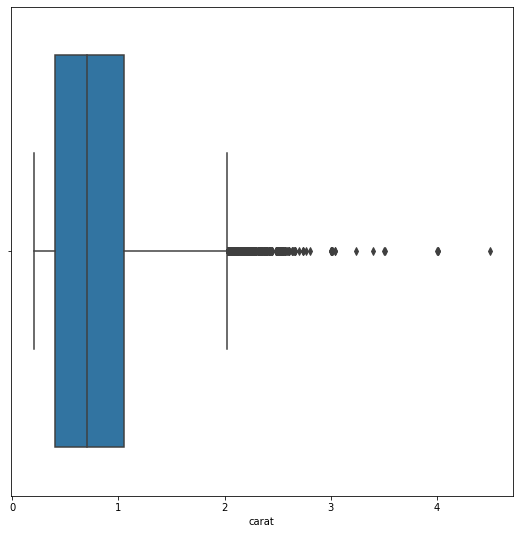

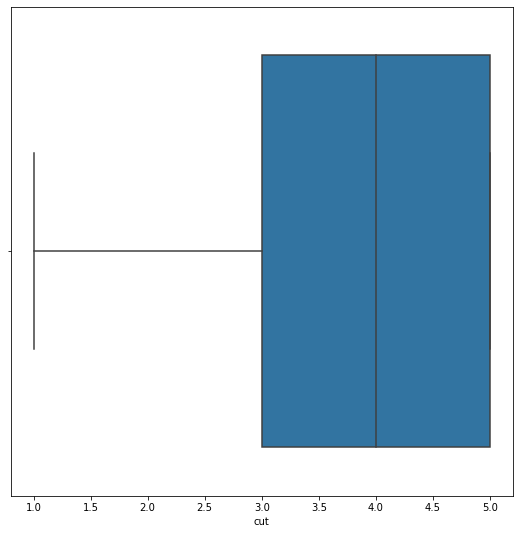

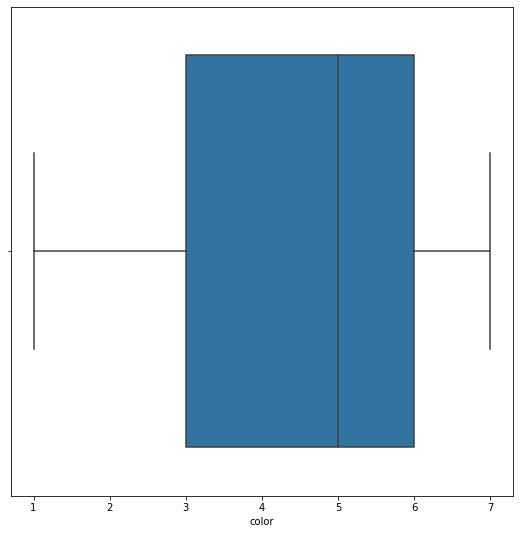

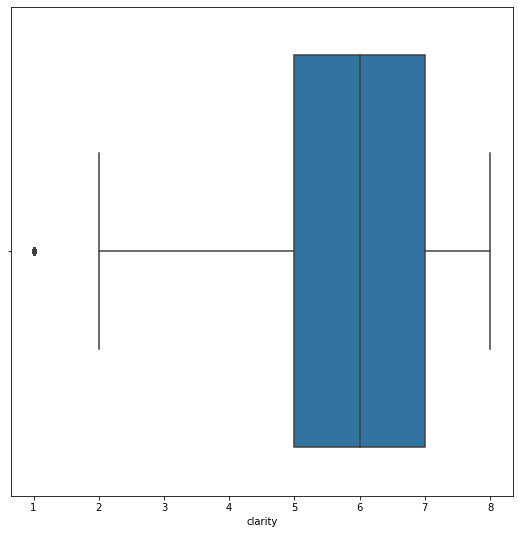

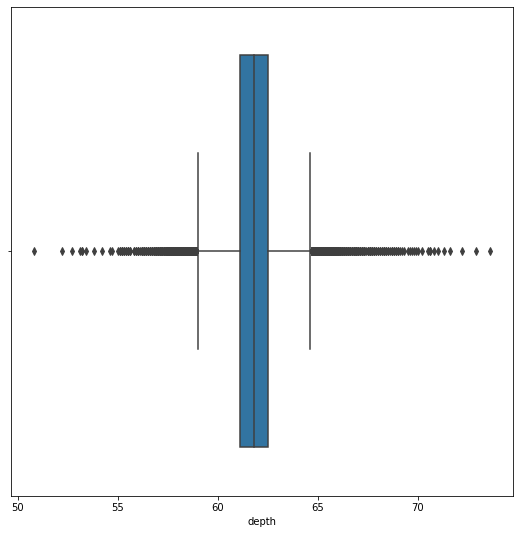

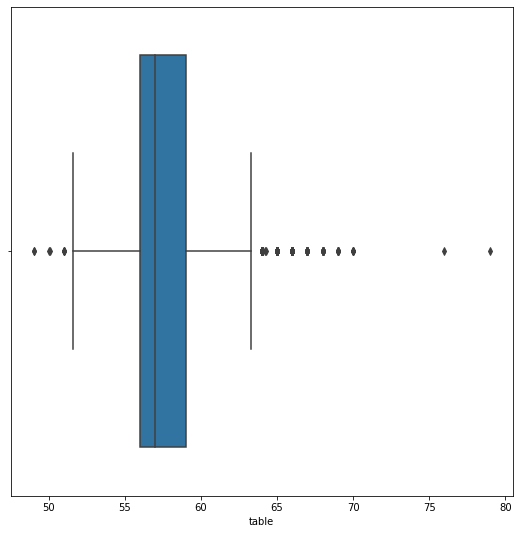

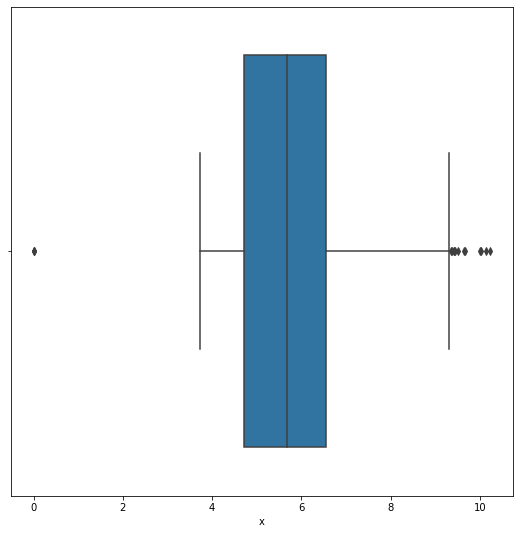

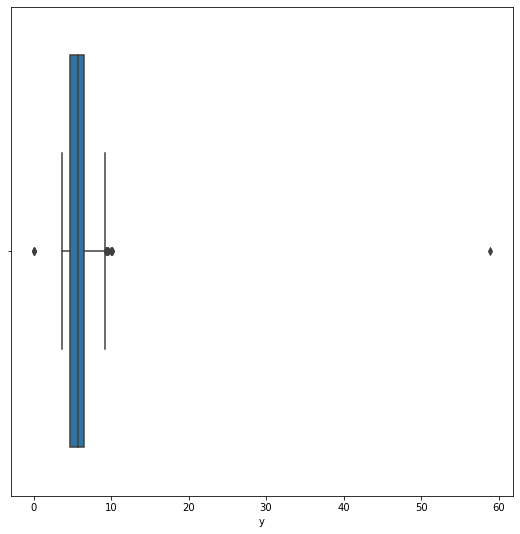

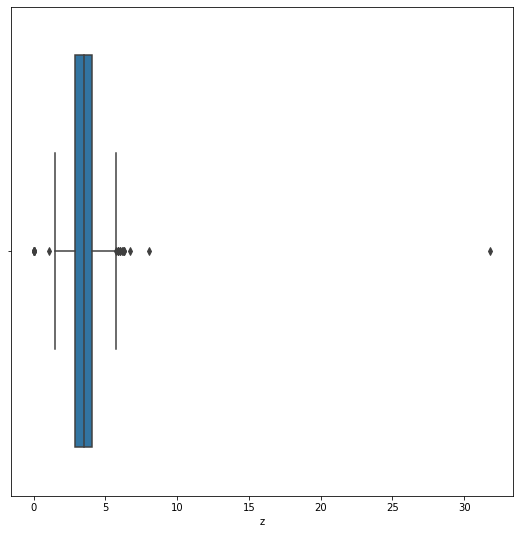

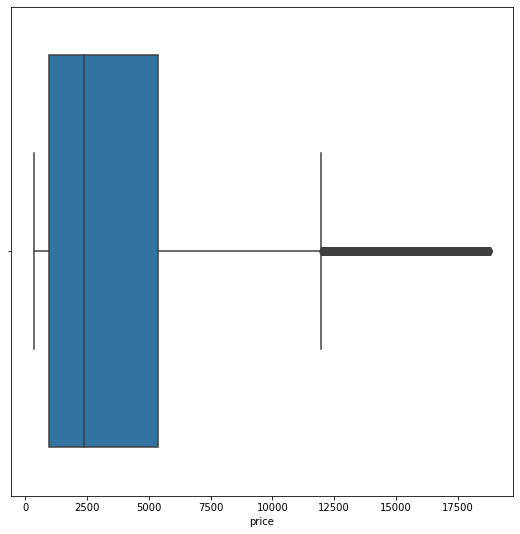

In [23]:
for i in df:
    sns.boxplot(df[i])
    plt.show()

**Interpretations :**
-  We  noticed that some other variables also contain extreme low and high values such as 'carat', 'clarity', 'depth', 'table' & 'price'. But we cannot consider them as outliers as those values were looked thoroughly and conlcuded that those values were logical and appropriate. Hence, they were not been considered as outliers and therefore shall not be removed/treated and we used those values in the data set while building the linear regression model. 

### Bivariate Analysis

### Correlation Matrix

In [24]:
correlation = df.corr(method='pearson')
correlation.round(4)

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.0000,-0.1406,-0.1953,0.1593,0.0349,0.1817,0.9764,0.9411,0.9406,0.9224
cut,-0.1406,1.0000,0.0438,-0.0952,-0.2117,-0.4432,-0.1321,-0.1267,-0.1533,-0.0602
color,-0.1953,0.0438,1.0000,-0.1057,-0.0345,-0.0352,-0.1772,-0.1711,-0.1734,-0.0940
clarity,0.1593,-0.0952,-0.1057,1.0000,0.0298,0.0901,0.1872,0.1785,0.1816,0.0878
depth,0.0349,-0.2117,-0.0345,0.0298,1.0000,-0.2940,-0.0184,-0.0244,0.0974,-0.0025
table,0.1817,-0.4432,-0.0352,0.0901,-0.2940,1.0000,0.1962,0.1823,0.1489,0.1269
x,0.9764,-0.1321,-0.1772,0.1872,-0.0184,0.1962,1.0000,0.9627,0.9566,0.8862
y,0.9411,-0.1267,-0.1711,0.1785,-0.0244,0.1823,0.9627,1.0000,0.9289,0.8562
z,0.9406,-0.1533,-0.1734,0.1816,0.0974,0.1489,0.9566,0.9289,1.0000,0.8505
price,0.9224,-0.0602,-0.0940,0.0878,-0.0025,0.1269,0.8862,0.8562,0.8505,1.0000


- It shows the Correlation Matrix of the original dataset using Pearson method.
- After this, a heatmap was created wrt to correlation matrix for visualization.

### Heatmap

A __correlation heatmap__ is a rectangular representation of data and it repeats the same data description twice because the categories are repeated on both axis for computing analysis. Hence, the same result is obtained twice. A correlation heatmap that presents data only once without repetition that is categories are correlated only once is known as a __triangle correlation heatmap__ . <Br> Since data is symmetric across the diagonal from left-top to right bottom the idea of obtaining a triangle correlation heatmap is to remove data above it so that it is depicted only once. The elements on the diagonal are the parts where categories of the same type correlate.

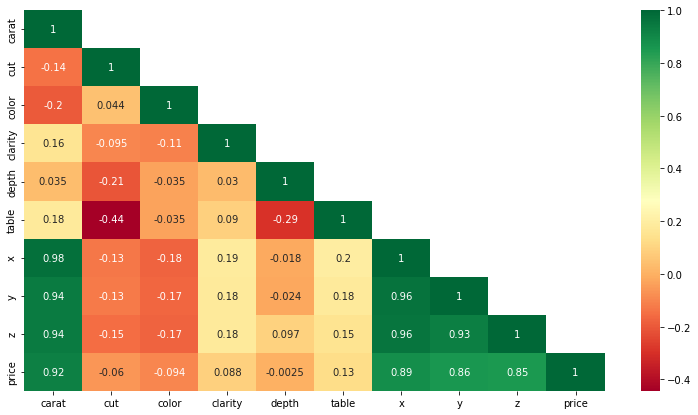

In [25]:
plt.figure(figsize=(13,7))

sns.heatmap(correlation,annot=True,mask=np.triu(correlation,+1),cmap='RdYlGn');

**Interpretations :**
- We noticed that there was a very high positive correlation value between 'carat' & other variables ('x','y','z') where 'x' has highest value of 98% and next to it were 'y' & 'z' having 94% value of correlation. This indicated that as the length, width, and height of the zirconia (in mm) , the price of the carat also increases.
- In additon to it, after these length, width & height of zirconia('x','y','z'), the next variable with a high positive correlation with 'carat' variable was the 'price' variable with 92% correlation value. It meant that as the weight of the carat increases, the price of the cubic zirconia also increases.
- Moving on to 'cut' variable, it had a medium strong negative correlation relationship with 'table' variable with 44% of correlation value. This meant that, the width of the cubic zirconia expressed in percentage of its average diameter in indirectly proportional to the cut quality of cubic zirconia. In other words, as the 'table' variable value increases, the cut quality decreases resulting in only fair of good quality of cubic zirconia.
- We inferred that, 'color' variable had very low correlation value  with all the other variables. Only 'x','y','z' had some of weak relationship with 'color' variable.
- Similarly, 'clarity' variable also had a mild correlation with 'x','y','z' with value of 18-19%. 

### Multivariate Analysis

 ### Pairplot

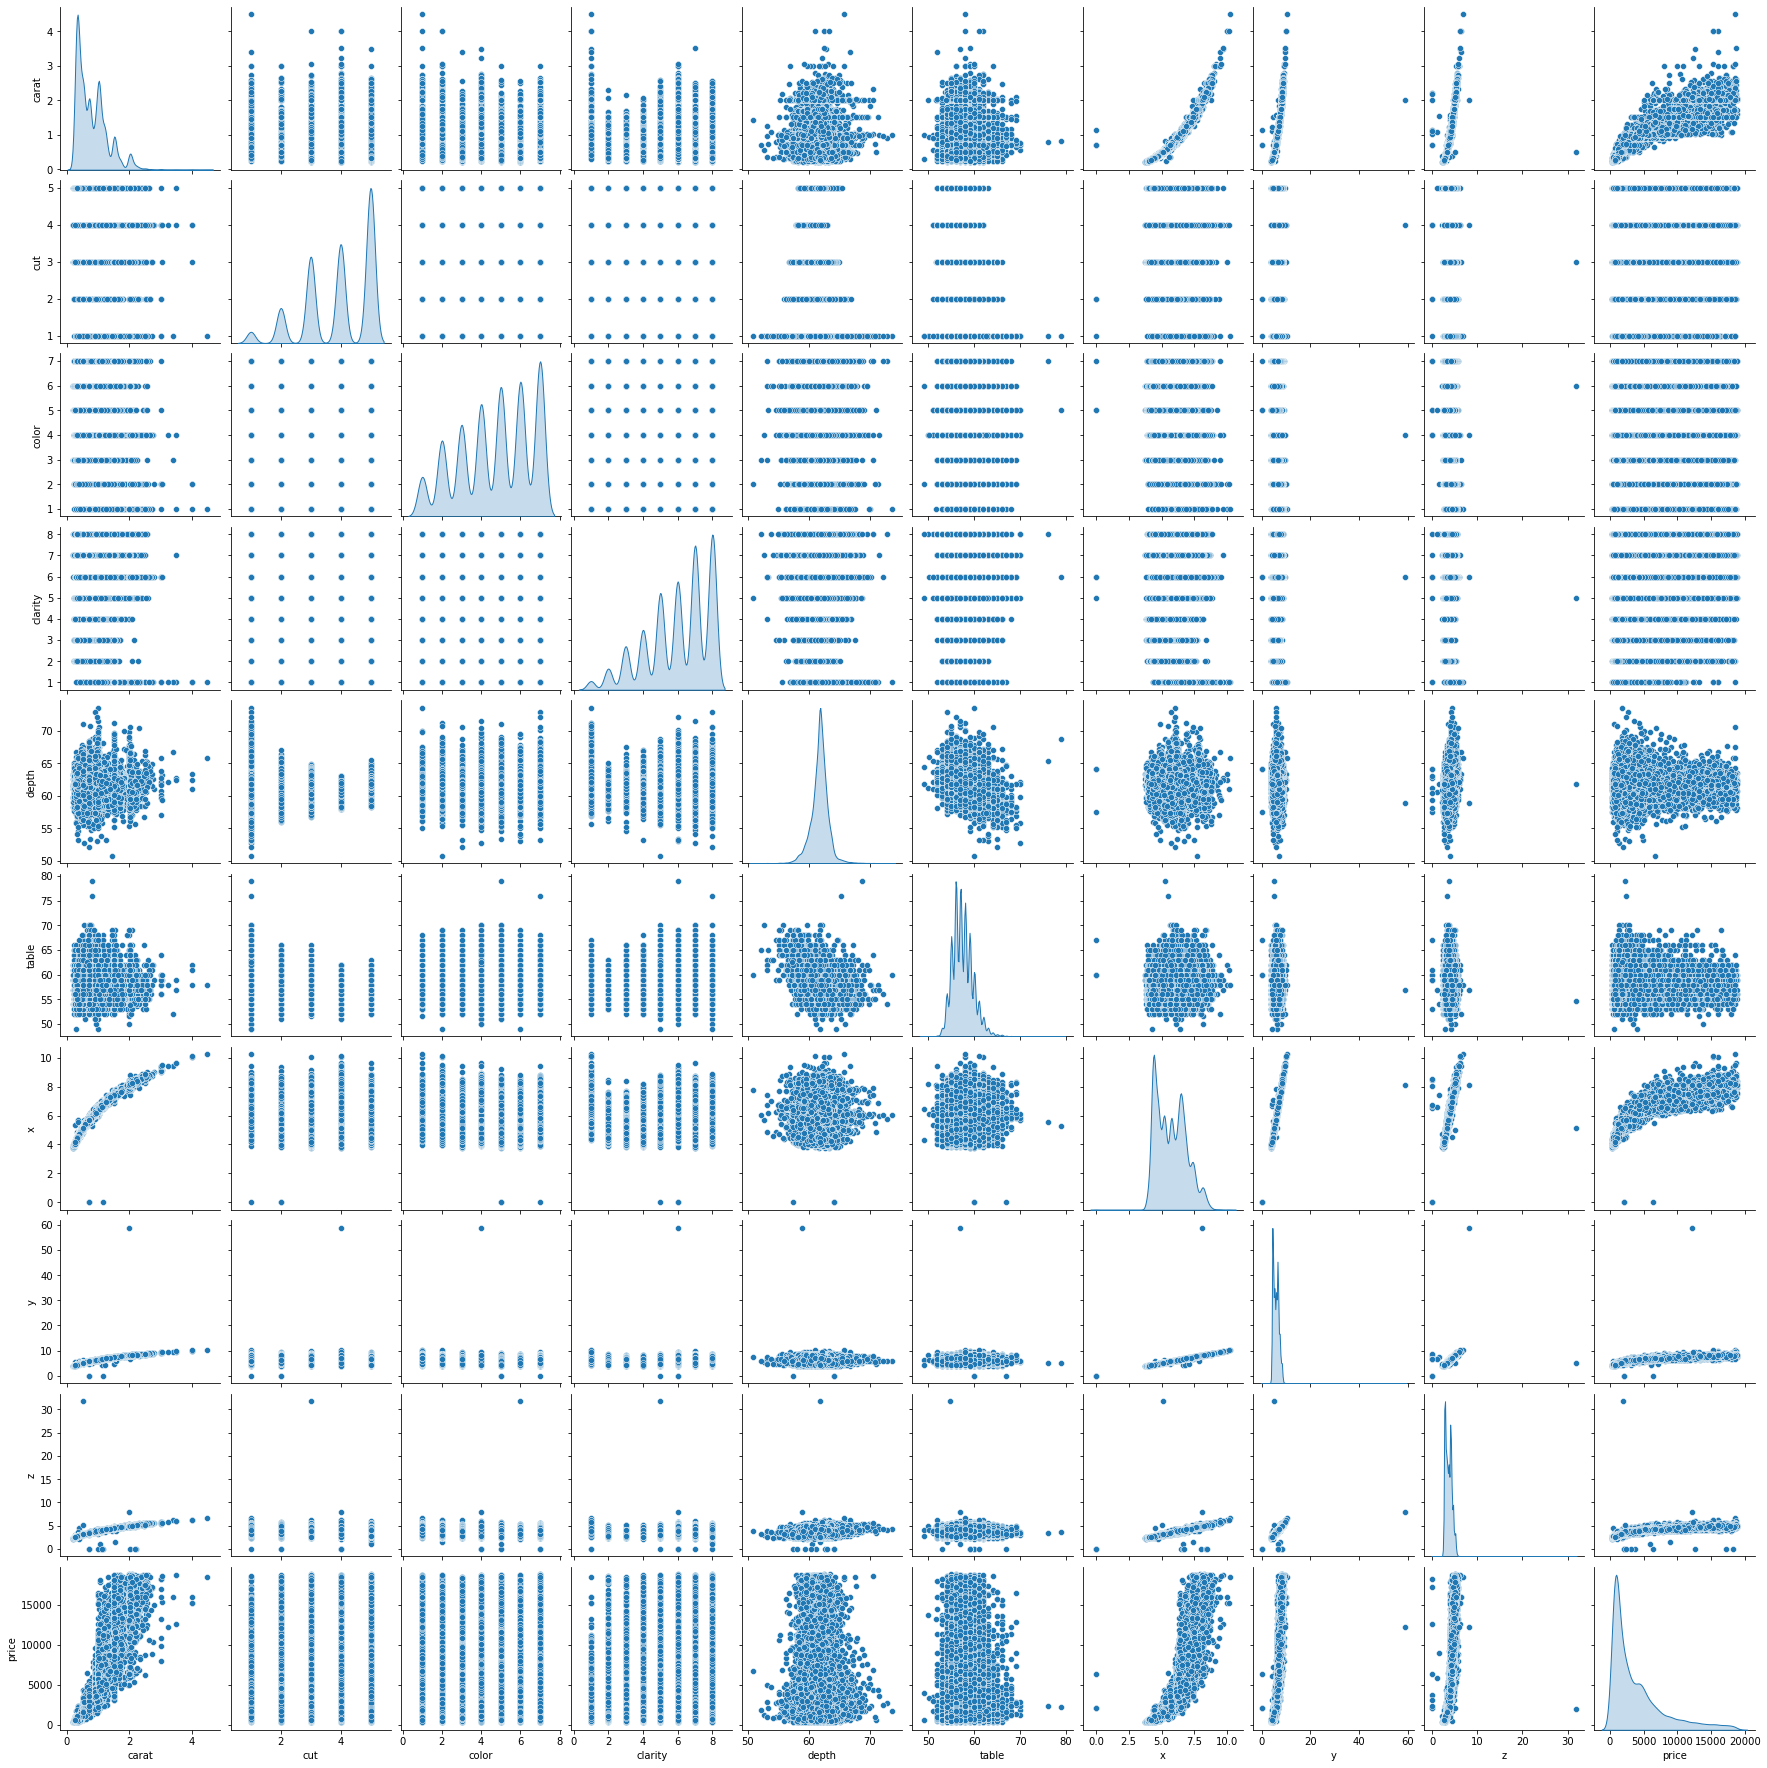

In [26]:
sns.pairplot(df,diag_kind='kde');

**Interpretations :**
- The data distribution across various dimensions except 'depth' do not look normal. Only 'depth' looked close to a normal distribution.
- It has been observed that hetroscedacity exists between 'carat' & 'depth' as well as between 'carat' & 'table' which will impact the model accuracy.
- The 'x' variable had a strong positive curvilinear relationship with 'carat' variable in additon with outliers being present at the lower left of the scatter plot existing between them as shown in the pairplot.
- Furthermore, 'y' variable also had a strong relation with 'carat' variable. This relation also comprises of outliers at extreme right side & extreme bottom left as being presented in the scatter plot shown inside the pairplot. This relation tells us that a little increase in 'y' variable (width of cubic zirconia in mm) can lead to very large increment in the 'carat' weight
- In addition, 'z' variable also had a strong relation with 'carat' variable in addition to outliers being present at the extreme left and on the extereme bottom right as well. This relation tells us that a little increase in 'z' variable (height of cubic zirconia in mm) can lead to very large increment in the 'carat' weight.

### Outliers

- The presence of outliers and influential cases can dramatically change the magnitude of regression coefficients and even the direction of coefficient signs (i.e., from positive to negative or vice versa). 
- So, these outliers must be find out and shall be treated in order to perform linear regression.

In [27]:
print(np.where(df['x']==0))

(array([ 5821,  6215, 17506], dtype=int64),)


In [28]:
print(np.where(df['y']==0))


(array([ 5821,  6215, 17506], dtype=int64),)


In [29]:
print(np.where(df['z']==0))

(array([ 5821,  6034,  6215, 10827, 12498, 12689, 17506, 18194, 23758],
      dtype=int64),)


In [30]:
df['z'].iloc[6035]

2.7

All the __outliers__ present in all three variables are as follows : 

In [31]:
Q1_x = np.percentile(df['x'], 25, interpolation = 'midpoint')
Q2_x = np.percentile(df['x'], 50, interpolation = 'midpoint')  
Q3_x = np.percentile(df['x'], 75, interpolation = 'midpoint')
IQR_x= Q3_x - Q1_x
print('Interquartile range is', IQR_x)
low_lim_x = Q1_x - 1.5 * IQR_x
up_lim_x = Q3_x + 1.5 * IQR_x
print('low_limit is', low_lim_x)
print('up_limit is', up_lim_x)
outlier_x =[]
for x in df['x']:
    if ((x> up_lim_x) or (x<low_lim_x)):
         outlier_x.append(x)
print(' outlier in the dataset is', outlier_x)


Interquartile range is 1.8399999999999999
low_limit is 1.9500000000000002
up_limit is 9.309999999999999
 outlier in the dataset is [10.02, 0.0, 0.0, 10.01, 9.65, 10.23, 9.42, 9.66, 9.36, 9.38, 9.42, 0.0, 9.51, 10.14, 9.44]


In [32]:
outlier_x

[10.02,
 0.0,
 0.0,
 10.01,
 9.65,
 10.23,
 9.42,
 9.66,
 9.36,
 9.38,
 9.42,
 0.0,
 9.51,
 10.14,
 9.44]

In [33]:
(df['x'] < 1.95).value_counts()

False    26964
True         3
Name: x, dtype: int64

In [34]:
(df['x'] > 9.35).value_counts()

False    26955
True        12
Name: x, dtype: int64

In [35]:
outlier_filter_x = df['x'] < 9.35
df = df[outlier_filter_x]

In [36]:
(df['x'] > 9.35).value_counts()

False    26955
Name: x, dtype: int64

Outlier Removed Successfully

In [37]:
outlier_rem_x = df['x']>0.5
df = df[outlier_rem_x]

In [38]:
(df['x'] < 0.5).value_counts()

False    26952
Name: x, dtype: int64

In [39]:
df['x'].min()

3.73

In [40]:
df['x'].max()

9.3

Outlier Removed Successfully

In [41]:
Q1_y = np.percentile(df['y'], 25, interpolation = 'midpoint')
Q2_y = np.percentile(df['y'], 50, interpolation = 'midpoint')  
Q3_y = np.percentile(df['y'], 75, interpolation = 'midpoint')
IQR_y= Q3_y - Q1_y
print('Interquartile range is', IQR_y)
low_lim_y = Q1_y - 1.5 * IQR_y
up_lim_y = Q3_y + 1.5 * IQR_y
print('low_limit is', low_lim_y)
print('up_limit is', up_lim_y)
outlier =[]
for y in df['y']:
    if ((y> up_lim_y) or (y<low_lim_y)):
         outlier.append(y)
print(' outlier in the dataset is', outlier)


Interquartile range is 1.83
low_limit is 1.9649999999999999
up_limit is 9.285
 outlier in the dataset is [58.9]


In [42]:
(df['y'] < 1.96).value_counts()

False    26952
Name: y, dtype: int64

In [43]:
(df['y'] > 9.285).value_counts()

False    26951
True         1
Name: y, dtype: int64

In [44]:
outlier_filter_y = df['y'] < 9.285
df = df[outlier_filter_y]

In [45]:
(df['y'] > 9.285).value_counts()

False    26951
Name: y, dtype: int64

Outlier removed successfully

In [46]:
outlier_rem_y = df['y']>1.96
df = df[outlier_rem_y]

In [47]:
(df['y'] < 1.96).value_counts()

False    26951
Name: y, dtype: int64

In [48]:
df['y'].min()

3.71

In [49]:
df['y'].max()

9.2

In [50]:
Q1_z = np.percentile(df['z'], 25, interpolation = 'midpoint')
Q2_z = np.percentile(df['z'], 50, interpolation = 'midpoint')  
Q3_z = np.percentile(df['z'], 75, interpolation = 'midpoint')
IQR_z= Q3_z - Q1_z
print('Interquartile range is', IQR_z)
low_lim_z = Q1_z - 1.5 * IQR_z
up_lim_z = Q3_z + 1.5 * IQR_z
print('low_limit is', low_lim_z)
print('up_limit is', up_lim_z)
outlier = []
for z in df['z']:
    if ((z> up_lim_z) or (z<low_lim_z)):
         outlier.append(z)
print(' outlier in the dataset is', outlier)

Interquartile range is 1.1400000000000001
low_limit is 1.1899999999999997
up_limit is 5.75
 outlier in the dataset is [31.8, 5.9, 0.0, 5.9, 0.0, 0.0, 0.0, 5.77, 0.0, 1.07, 0.0]


In [51]:
(df['z'] < 1.189).value_counts()

False    26944
True         7
Name: z, dtype: int64

In [52]:
(df['z'] > 5.75).value_counts()

False    26947
True         4
Name: z, dtype: int64

In [53]:
outlier_filter_z = df['z'] < 5.75
df = df[outlier_filter_z]

In [54]:
(df['z'] > 5.75).value_counts()

False    26946
Name: z, dtype: int64

In [55]:
outlier_rem_z = df['z']>1.189
df = df[outlier_rem_z]

In [56]:
df['z'].min()

1.53

In [57]:
df['z'].max()

5.73

- Using the IQR and comparison operator, we were able to treat the outliers existing in 'x','y','z' variables. 
- We also noticed that some other variables also contain extreme low and high values such as 'carat', 'clarity', 'depth', 'table' & 'price'. But we cannot consider them as outliers as those values were looked thoroughly and conlcuded that those values were logical and appropriate. Hence, they were not been considered as outliers and therefore shall not be removed/treated and we used those values in the data set while building the linear regression model. 
- Hence, we can proceed further into building linear regression model.

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26939 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26939 non-null  float64
 1   cut      26939 non-null  int64  
 2   color    26939 non-null  int64  
 3   clarity  26939 non-null  int64  
 4   depth    26939 non-null  float64
 5   table    26939 non-null  float64
 6   x        26939 non-null  float64
 7   y        26939 non-null  float64
 8   z        26939 non-null  float64
 9   price    26939 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 2.3 MB


Now, all the necessary values with outliers have been treated.

### Problem 1.2 Use the Pre-processed Full Data to develop a model to identify significant predictors. Check whether the proposed model is free of multicollinearity. Apply variable selection method as required. Show all intermediate models leading to the final model. Justify your choice of the final model. Which are the significant predictors?

### Linear Regression Model

In [59]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

#### Base Model / Model 1

We build a model without scaling the data.

__Note__ - There was very high correlation between 'x' & 'price', 'y' & 'price' and 'z' & 'price which could lead to high multicollinearity in the linear regression model. So, these variables were removed/not included in the model building.

In [60]:
f_1 = 'price ~ carat + cut + color + clarity + depth + table + x + y + z '

The coefficients for carat , cut , color, y were very large while for depth, table,clarity, x & z the coefficient value were very low but that doesn't really mean they were more influential compared to price. It was simply because out data set has not been normalized and the data range for each of these columns vary widely.

In [61]:
model_1 = sm.ols(f_1,data=df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                 2.189e+04
Date:                Sun, 17 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:03:31   Log-Likelihood:            -2.3322e+05
No. Observations:               26939   AIC:                         4.665e+05
Df Residuals:                   26929   BIC:                         4.665e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3413.0275   1172.162      2.912      0.004    1115.530    5710.525
carat       1.211e+04     92.575    130.760      0.000    1.19e+04    1.23e+04
cut          178.3381      9.340     19.095      0.000     160.032     196.644
color        201.9527      4.755     42.474      0.000     192.633     211.272
clarity      -84.1914      4.900    -17.183      0.000     -93.795     -74.588
depth         25.0366     17.210      1.455      0.146      -8.695      58.768
table        -37.3420      4.860     -7.683      0.000     -46.868     -27.816
x          -3222.1700    162.933    -19.776      0.000   -3541.528   -2902.812
y           3269.9488    164.203     19.914      0.000    2948.103    3591.794
z          -2812.0645    262.506    -10.712      0.000   -3326.590   -2297.539
==============================================================================
Omnibus:                     6748.659   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           124684.802
Skew:                           0.733   Prob(JB):                         0.00
Kurtosis:                      13.437   Cond. No.                     1.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
model_1.params

Intercept     3413.027476
carat        12105.115358
cut            178.338058
color          201.952717
clarity        -84.191399
depth           25.036612
table          -37.341976
x            -3222.170030
y             3269.948819
z            -2812.064540
dtype: float64

#### VIF for Model_1

In [63]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [64]:
vif_cal(input_data = df[['carat','cut','color','clarity','depth','table','x','y','z']])

carat  VIF =  334.6
cut  VIF =  334.6
color  VIF =  334.6
clarity  VIF =  334.6
depth  VIF =  334.6
table  VIF =  334.6
x  VIF =  334.6
y  VIF =  334.6
z  VIF =  334.6


**Interpretations :**
- The R2 value and Adj R2 value are almost equal. 
- All variables had same VIF . This indicates that there was very high multicollinearity between the independent variables and the dependent variable.
- Thus, we need to remove those variables with high correlation and considering VIF values.

#### Model 2

__Note__ - There was very high correlation between 'z' & 'price which could lead to high multicollinearity in the linear regression model as shown in the pairplot(scatter plot of z and price). So, this variable was removed/not included in the model building.

In [65]:
#2nd Iteration
f_2 = 'price ~ carat + cut + color + clarity +depth + table + x + y'

In [66]:
model_2 = sm.ols(f_2,data=df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                 2.451e+04
Date:                Sun, 17 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:03:32   Log-Likelihood:            -2.3327e+05
No. Observations:               26939   AIC:                         4.666e+05
Df Residuals:                   26930   BIC:                         4.666e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.359e+04    687.420     19.777      0.000    1.22e+04    1.49e+04
carat       1.204e+04     92.594    130.073      0.000    1.19e+04    1.22e+04
cut          179.1413      9.359     19.141      0.000     160.797     197.486
color        201.1116      4.764     42.213      0.000     191.774     210.450
clarity      -83.5254      4.910    -17.012      0.000     -93.149     -73.902
depth       -142.1681      7.264    -19.571      0.000    -156.406    -127.930
table        -36.7151      4.870     -7.539      0.000     -46.261     -27.169
x          -4043.7253    144.059    -28.070      0.000   -4326.088   -3761.363
y           2381.9870    142.044     16.769      0.000    2103.574    2660.400
==============================================================================
Omnibus:                     6724.927   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           123781.172
Skew:                           0.730   Prob(JB):                         0.00
Kurtosis:                      13.399   Cond. No.                     6.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
vif_cal(input_data = df[['carat','cut','color','clarity','depth','table','x','y']])

carat  VIF =  334.6
cut  VIF =  334.6
color  VIF =  334.6
clarity  VIF =  334.6
depth  VIF =  334.6
table  VIF =  334.6
x  VIF =  334.6
y  VIF =  334.6


In [68]:
model_2.pvalues

Intercept     1.944078e-86
carat         0.000000e+00
cut           3.990284e-81
color         0.000000e+00
clarity       1.448977e-64
depth         1.050665e-84
table         4.891445e-14
x            6.590380e-171
y             8.514567e-63
dtype: float64

**Interpretations :**
- All the p values of the model were below 0.05  but as we check the VIF values, all variables were having the same value indicating that multicollinearity had not been removed yet.
- Thus we need to remove particular variables.

#### Model 3

__Note__ - There was very high correlation between 'y' & 'price which could lead to high multicollinearity in the linear regression model as shown in the pairplot(scatter plot of y and price). So, this variable was removed/not included in the model building.

In [69]:
# 3rd iteration , we are removing 'table' and building a linear regression model.
f_3 = 'price ~ carat + cut + color + clarity +depth + table + x'

In [70]:
model_3 = sm.ols(f_3,data=df).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                 2.768e+04
Date:                Sun, 17 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:03:32   Log-Likelihood:            -2.3341e+05
No. Observations:               26939   AIC:                         4.668e+05
Df Residuals:                   26931   BIC:                         4.669e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.581e+04    678.075     23.320      0.000    1.45e+04    1.71e+04
carat       1.214e+04     92.905    130.642      0.000     1.2e+04    1.23e+04
cut          162.5317      9.355     17.374      0.000     144.196     180.868
color        200.4908      4.789     41.867      0.000     191.105     209.877
clarity      -84.3258      4.935    -17.087      0.000     -93.999     -74.653
depth       -159.9287      7.224    -22.139      0.000    -174.088    -145.770
table        -50.5642      4.825    -10.481      0.000     -60.020     -41.108
x          -1718.1503     39.200    -43.830      0.000   -1794.985   -1641.316
==============================================================================
Omnibus:                     6564.127   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           129508.486
Skew:                           0.678   Prob(JB):                         0.00
Kurtosis:                      13.656   Cond. No.                     6.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
vif_cal(input_data = df[['carat','cut','color','clarity','depth','table','x']])

carat  VIF =  24.07
cut  VIF =  1.02
color  VIF =  1.03
clarity  VIF =  1.04
depth  VIF =  1.0
table  VIF =  1.04
x  VIF =  inf


**Interpretations :**
- As we can see that the VIF had been improved as we removed the 'y' variable.
- But 'x' variable is showing infinite VIF value which is absurd and thus is should removed.

#### Model 4

__Note :__ We are removing 'x' and building a linear regression model.

In [72]:
#4th Iteration
f_4 = 'price ~ carat + cut + color + clarity +depth + table '

In [73]:
model_4 = sm.ols(f_4,data=df).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                 2.985e+04
Date:                Sun, 17 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:03:32   Log-Likelihood:            -2.3434e+05
No. Observations:               26939   AIC:                         4.687e+05
Df Residuals:                   26932   BIC:                         4.688e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4696.5250    650.885      7.216      0.000    3420.756    5972.294
carat       8150.7616     19.598    415.904      0.000    8112.349    8189.174
cut          172.6854      9.680     17.840      0.000     153.713     191.658
color        184.4549      4.942     37.324      0.000     174.768     194.141
clarity     -118.4270      5.044    -23.479      0.000    -128.313    -108.541
depth        -84.8299      7.263    -11.679      0.000     -99.067     -70.593
table        -49.6423      4.993     -9.941      0.000     -59.430     -39.855
==============================================================================
Omnibus:                     5955.743   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58859.291
Skew:                           0.781   Prob(JB):                         0.00
Kurtosis:                      10.071   Cond. No.                     6.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
vif_cal(input_data = df[['carat','cut','color','clarity','depth','table']])

carat  VIF =  1.1
cut  VIF =  1.48
color  VIF =  1.05
clarity  VIF =  1.04
depth  VIF =  1.31
table  VIF =  1.59


**Interpretations :**
- As inferred , we can say that VIF value had been improved a lot but still 'table' variable had some high VIF value so it should be treated/removed.

#### Model 5

__Note :__ We removed 'table' variable as VIF value for it was high as compared to others.

In [75]:
#5th Iteration
f_5 = 'price ~ carat + cut + color + clarity +depth '

In [76]:
model_5 = sm.ols(f_5,data=df).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                 3.567e+04
Date:                Sun, 17 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:03:32   Log-Likelihood:            -2.3439e+05
No. Observations:               26939   AIC:                         4.688e+05
Df Residuals:                   26933   BIC:                         4.688e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -313.3939    412.685     -0.759      0.448   -1122.278     495.490
carat       8122.9965     19.433    418.003      0.000    8084.907    8161.086
cut          223.4050      8.241     27.110      0.000     207.253     239.557
color        184.4695      4.951     37.259      0.000     174.765     194.174
clarity     -120.5601      5.049    -23.880      0.000    -130.456    -110.665
depth        -52.5336      6.508     -8.072      0.000     -65.290     -39.777
==============================================================================
Omnibus:                     5962.974   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58549.053
Skew:                           0.785   Prob(JB):                         0.00
Kurtosis:                      10.050   Cond. No.                     2.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
vif_cal(input_data = df[['carat','cut','color','clarity','depth']])

carat  VIF =  1.08
cut  VIF =  1.07
color  VIF =  1.05
clarity  VIF =  1.04
depth  VIF =  1.05


**Interpretations :**
- The P value had increased significantly for intercept with value greater than 0.05. So, it shall be corrected by making some changes in the model.
- The VIF values are now significant but P value is not that shall be treated.
- We removed 'depth' column as in the scatter plot(pairplot) , it had almost no relation with price but as we can see the coefficent value in model 5, it had value of - 52.53. This means that for every change of 1 in depth variable, the price of cubic zirconia gets decreased by 52.53. Thus 'depth' column should be removed.

#### Model 6

__Note :__ We removed 'depth' column as in the scatter plot(pairplot) , it had almost no relation with price but as we can see the coefficent value in model 5, it had value of - 52.53. This means that for every change of 1 in depth variable, the price of cubic zirconia gets decreased by 52.53. Thus 'depth' column should be removed.

In [78]:
#6th Iteration
f_6 = 'price ~ carat + cut + color + clarity '

In [79]:
model_6 = sm.ols(f_6,data=df).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 4.446e+04
Date:                Sun, 17 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:03:33   Log-Likelihood:            -2.3442e+05
No. Observations:               26939   AIC:                         4.689e+05
Df Residuals:                   26934   BIC:                         4.689e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3614.0715     55.766    -64.808      0.000   -3723.376   -3504.767
carat       8123.1753     19.456    417.515      0.000    8085.041    8161.310
cut          237.2058      8.071     29.389      0.000     221.386     253.026
color        185.4473      4.955     37.423      0.000     175.734     195.160
clarity     -120.8573      5.054    -23.911      0.000    -130.764    -110.950
==============================================================================
Omnibus:                     5947.360   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59360.244
Skew:                           0.777   Prob(JB):                         0.00
Kurtosis:                      10.104   Cond. No.                         56.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
vif_cal(input_data = df[['carat','cut','color','clarity']])

carat  VIF =  1.08
cut  VIF =  1.03
color  VIF =  1.05
clarity  VIF =  1.04


**Interpretations :**
- Now, all statistical parameters being checked such as p value, VIF value etc , this model had all the appropriate things which must be required in our linear regression model.

In [81]:
print('For the first MLR model:','\n')

print('Rsquared',model_1.rsquared)
print('Adjusted Rsquared',model_1.rsquared_adj)

For the first MLR model: 

Rsquared 0.8797543423603084
Adjusted Rsquared 0.8797141547960187


In [82]:
print('For the sixth MLR model:','\n')

print('Rsquared',model_6.rsquared)
print('Adjusted Rsquared',model_6.rsquared_adj)

For the sixth MLR model: 

Rsquared 0.8684798338471683
Adjusted Rsquared 0.8684603016326955


We have thus seen the effects and power of various variables on describing the target variable.

In [83]:
model_6.pvalues

Intercept     0.000000e+00
carat         0.000000e+00
cut          6.694172e-187
color        7.350930e-299
clarity      4.712731e-125
dtype: float64

**Interpretations :**
- Hence __Model 6__ is the best  model as per the analysis.

#### Predict Using Model 6

In [84]:
model_pred = model_6.fittedvalues
model_pred 

0         154.735404
1        1071.815949
2        5037.658212
3        1306.641063
4         654.806376
            ...     
26962    6682.748909
26963     752.679902
26964    1744.253728
26965    -265.389529
26966    6707.309769
Length: 26939, dtype: float64

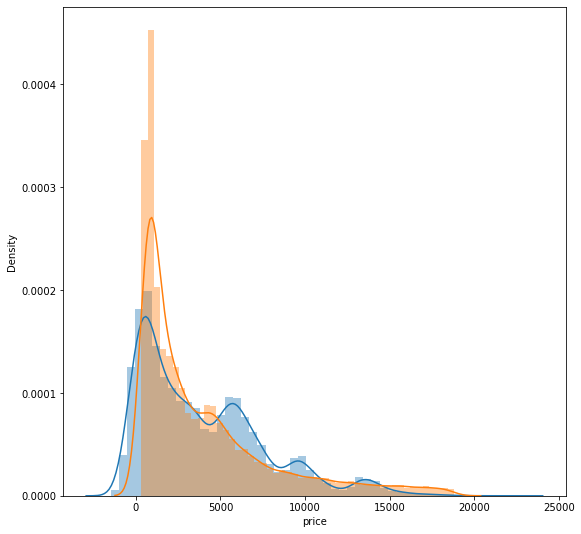

In [85]:
sns.distplot(model_6.fittedvalues)
sns.distplot(df['price']);

 Blue is the fitted values(predicted) and orange is the actual values

<AxesSubplot:>

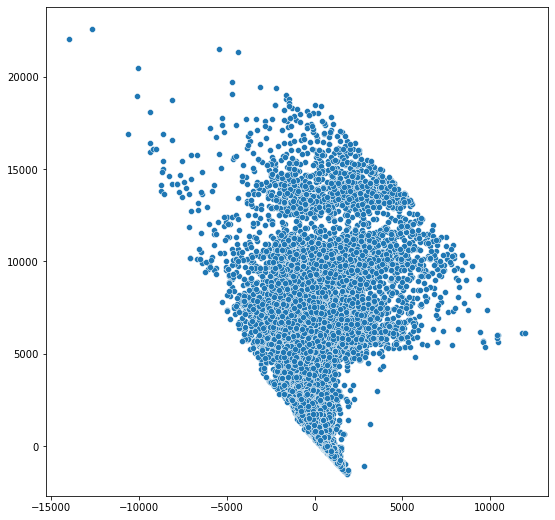

In [86]:
#Linear Relationship b/w Dependent and Independent Variables 

sns.scatterplot(model_6.resid,model_6.fittedvalues)


<AxesSubplot:title={'center':'Boxplot of the residuals'}>

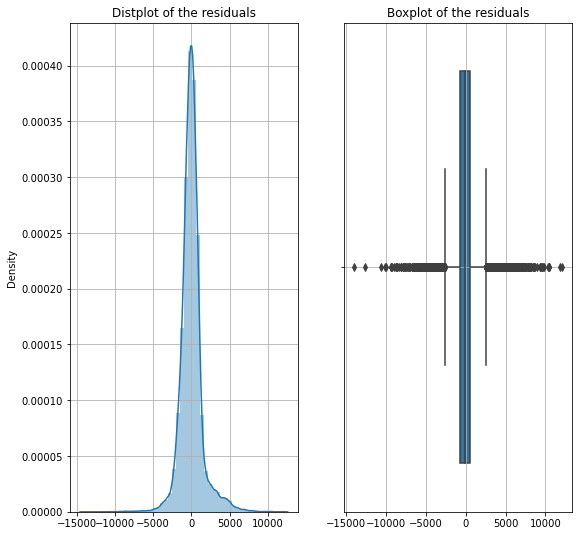

In [87]:

f,a =  plt.subplots(1,2,sharex=False,sharey=False,squeeze=False)


plot_0 = sns.distplot(model_6.resid,ax=a[0][0])
a[0][0].set_title('Distplot of the residuals')
a[0][0].grid()

plot_1 = sns.boxplot(model_6.resid,orient='v',ax=a[0][1])
a[0][1].set_title('Boxplot of the residuals')
a[0][1].grid();
plot_1

## Conclusions From 6th Iteration that is Best Model

#### Price = (carat x 8123.1753) + (cut x 237.2058) + (color x 185.4473) + (clarity x (-120.8573))
- The above equation is the best equation for predicting the price of cubic zirconia.
- It includes all the best predictors required to find out the price of cubic zirconia.

### Problem 1.3 Alternatively, if prediction accuracy of the price is the only objective, then you may want to divide the data into a training and a test set, chosen randomly, and use the training set to develop a model and test set to validate your model. Use the models developed in Part (2) to compare accuracy in training and test sets. Compare the final model of Part (2) and the proposed one in Part (3). Which model provides the most accurate prediction? If the model found in Part (2) is different from the proposed model in Part (3), give an explanation.

### Building Linear Regression Model Using Sklearn Library

If we only wanted to predict using Linear Regression and was not looking for the model building aspect of it, we can do that as well.

First we will split the data into train and test. We will build the model on the training data and check the RMSE on the test data.

###### Note: We are going to build all the models and use those predict first and then go on to evaluate those models.

In [88]:
# Copy all the predictor variables into X dataframe. Since 'price' is dependent variable drop it
X = df[['carat','cut','color','clarity','depth','table','x','y','z']]

# Copy the 'price' column alone into the y dataframe. This is the dependent variable
y = df[['price']]


Here we are not spliting the data into three parts as we should do in real world scenarios. Here we just split the data into two parts which are train and test data.

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

Invoke the LinearRegression function and find the bestfit model on training data


In [91]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [92]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lr.coef_[0][idx]))

The coefficient for carat is 12254.391110693732
The coefficient for cut is 187.85921675837844
The coefficient for color is 201.98584902887168
The coefficient for clarity is -78.21184449236071
The coefficient for depth is 100.11553666696564
The coefficient for table is -32.811708310325606
The coefficient for x is -3033.4259201729487
The coefficient for y is 3779.512834183381
The coefficient for z is -4048.898699780267


In [93]:
# Let us check the intercept for the model

intercept = lr.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1306.0587587209106


### Base Model  building using sklearn Linear Regression 

In [94]:
model_base = lr.fit(X_train[['carat', 'cut', 'color','clarity', 'depth', 'table','x', 'y', 'z']],y_train)

In [95]:
#Training Data Prediction

model_base_train = model_base.predict(X_train[['carat', 'cut', 'color','clarity','depth', 'table','x','y','z']]) 

In [96]:
#Test Data Prediction

model_base_test = model_base.predict(X_test[['carat', 'cut', 'color','clarity','depth', 'table','x','y','z']])

In [97]:
RMSE_Train_base = np.round(np.sqrt(mean_squared_error(y_train,model_base_train)),2)
RMSE_Test_base = np.round(np.sqrt(mean_squared_error(y_test,model_base_test)),2)


print('Training Data RMSE of model_base:',RMSE_Train_base )
print('Test Data RMSE of model_base:',RMSE_Test_base)

Training Data RMSE of model_base: 1385.3
Test Data RMSE of model_base: 1408.65


**Interpretations :**
- As we can see that RMSE(Root Mean Square Error) for train and test data were not similar and their was some difference between them.

In [98]:
resultDf_trn = pd.DataFrame({'RMSE Training Data':[RMSE_Train_base],'RMSE Test Data':[RMSE_Test_base]},index=['Base Model'])
resultDf_trn

,RMSE Training Data,RMSE Test Data
Base Model,1385.3,1408.65


### Iteration Model 2 using Sklearn Library

As 'z' had very high correlation with price as shown in the scatter plot(pairplot), thus 'z' variable must be removed from the model.

In [99]:
model_sk_2 = lr.fit(X_train[['carat', 'cut', 'color','clarity', 'depth', 'table','x','y']],y_train)

In [100]:
#Training Data Prediction

model_sk_2_train = model_sk_2.predict(X_train[['carat', 'cut', 'color','clarity','depth', 'table','x','y']])

In [101]:
#Test Data Prediction

model_sk_2_test = model_sk_2.predict(X_test[['carat', 'cut', 'color','clarity','depth', 'table','x','y']])

In [102]:
RMSE_Train_sk_2 = np.round(np.sqrt(mean_squared_error(y_train,model_sk_2_train)),2)
RMSE_Test_sk_2 = np.round(np.sqrt(mean_squared_error(y_test,model_sk_2_test)),2)


print('Training Data RMSE of model_2:',RMSE_Train_sk_2 )
print('Test Data RMSE of model_2:',RMSE_Test_sk_2)

Training Data RMSE of model_2: 1389.89
Test Data RMSE of model_2: 1405.97


**Interpretations :**
- Some improvement had been done since 'z' variable had been removed but still the model was not fit significantly.
- Thus, we need to improve the model by removing 'y' variable as it had a very high strong correlation with 'price' and thus this was leading to multicollinearity which should be fixed.

### Iteration Model 3 using Sklearn Library

In [103]:
model_sk_3 = lr.fit(X_train[['carat', 'cut', 'color','clarity', 'depth', 'table','x']],y_train)

In [104]:
#Training Data Prediction

model_sk_3_train = model_sk_3.predict(X_train[['carat', 'cut', 'color','clarity','depth', 'table','x']])

In [105]:
#Test Data Prediction

model_sk_3_test = model_sk_3.predict(X_test[['carat', 'cut', 'color','clarity','depth', 'table','x']])

In [106]:
RMSE_Train_sk_3 = np.round(np.sqrt(mean_squared_error(y_train,model_sk_3_train)),2)
RMSE_Test_sk_3 = np.round(np.sqrt(mean_squared_error(y_test,model_sk_3_test)),2)


print('Training Data RMSE of model_3:',RMSE_Train_sk_3 )
print('Test Data RMSE of model_3:',RMSE_Test_sk_3)

Training Data RMSE of model_3: 1396.77
Test Data RMSE of model_3: 1414.12


**Interpretations :**
- Instead of improvement, the difference between test and train data had increased which should be fixed.
- For that, other high correlation variables with price must be removed .

### Iteration Model 4 using Sklearn Library

As 'x' had  a high correlation value with price as shown in the scatter plot, thus it should be removed because it is impacting the model.

In [107]:
model_sk_4 = lr.fit(X_train[['carat', 'cut', 'color','clarity', 'depth', 'table']],y_train)

In [108]:
#Training Data Prediction

model_sk_4_train = model_sk_4.predict(X_train[['carat', 'cut', 'color','clarity','depth', 'table']])

In [109]:
#Test Data Prediction

model_sk_4_test = model_sk_4.predict(X_test[['carat', 'cut', 'color','clarity','depth', 'table']])

In [110]:
RMSE_Train_sk_4 = np.round(np.sqrt(mean_squared_error(y_train,model_sk_4_train)),2)
RMSE_Test_sk_4 = np.round(np.sqrt(mean_squared_error(y_test,model_sk_4_test)),2)


print('Training Data RMSE of model_4:',RMSE_Train_sk_4)
print('Test Data RMSE of model_4:',RMSE_Test_sk_4)

Training Data RMSE of model_4: 1449.97
Test Data RMSE of model_4: 1453.55


**Interpretations :**
- Improvement has been there now but still the RMSE values between test ans train were different to some levels and that must be fixed by appropriate measures.
- For that, other variables must be removed .

### Iteration Model 5 using Sklearn Library

Removing the depth column because of the scatter plot(pairplot) , it had almost no relation with price.

In [111]:
model_sk_5 = lr.fit(X_train[['carat', 'cut', 'color','clarity', 'table']],y_train)

In [112]:
#Training Data Prediction

model_sk_5_train = model_sk_5.predict(X_train[['carat', 'cut', 'color','clarity', 'table']])

In [113]:
#Test Data Prediction

model_sk_5_test = model_sk_5.predict(X_test[['carat', 'cut', 'color','clarity', 'table']])

In [114]:
RMSE_Train_sk_5 = np.round(np.sqrt(mean_squared_error(y_train,model_sk_5_train)),2)
RMSE_Test_sk_5 = np.round(np.sqrt(mean_squared_error(y_test,model_sk_5_test)),2)


print('Training Data RMSE of model_5:',RMSE_Train_sk_5 )
print('Test Data RMSE of model_5:',RMSE_Test_sk_5)

Training Data RMSE of model_5: 1453.47
Test Data RMSE of model_5: 1457.6


**Interpretations :**
- Improvement has been there now but still the RMSE values between test ans train were different to some levels and that must be fixed by appropriate measures.
- For that, other variables with price must be removed .

### Iteration Model 6 using Sklearn Library

We removed 'table' variable.

In [115]:
model_sk_6 = lr.fit(X_train[['carat', 'cut', 'color','clarity']],y_train)

In [116]:
#Training Data Prediction

model_sk_6_train = model_sk_6.predict(X_train[['carat', 'cut', 'color','clarity']])

In [117]:
#Test Data Prediction

model_sk_6_test = model_sk_6.predict(X_test[['carat', 'cut', 'color','clarity']])

In [118]:
RMSE_Train_sk_6 = np.round(np.sqrt(mean_squared_error(y_train,model_sk_6_train)),2)
RMSE_Test_sk_6 = np.round(np.sqrt(mean_squared_error(y_test,model_sk_6_test)),2)


print('Training Data RMSE of model_6:',RMSE_Train_sk_6 )
print('Test Data RMSE of model_6:',RMSE_Test_sk_6)

Training Data RMSE of model_6: 1454.04
Test Data RMSE of model_6: 1458.7


In [119]:
# Model 6 is written as best model as it has all the appropriate qualities of the very good linear regression model.
resultDf_tst = pd.DataFrame({'RMSE Training Data':[RMSE_Train_sk_6],'RMSE Test Data':[RMSE_Test_sk_6]},index=['Best Model'])
resultDf_tst

,RMSE Training Data,RMSE Test Data
Best Model,1454.04,1458.7


**Interpretations :**
- We noticed that, the RMSE(Root Mean Square Error) for both train and test were very close to each other and similar.
- Hence, we can state that 'model 6' was the best model that was build.
- Thus we can say that the best model had a very good prediction and can be considered as a very good fit model.

#### Comparing the Base & Best Model Build Using Sklearn library

In [120]:
resultDf = pd.concat([resultDf_trn, resultDf_tst])
resultDf

,RMSE Training Data,RMSE Test Data
Base Model,1385.30,1408.65
Best Model,1454.04,1458.70


**Conclusion :**
- This comparison of RMSE of both base model and best model had clearly shown that the best model was very similar/very close to each other for the value of RMSE(Root Mean Square Error)
- It indicated that best model was an absolute fit of the model to the data meaning how close the observed data were to the model's predicted values.

### Accuracy Assesement 

Since this is regression, plot the predicted y value vs actual y values for the test data

### Accuracy Assesment For Base Model & Best Model (statsmodels library)

The accuracy for base & best model using statsmodel library were checked .

In [121]:
#A good model's prediction will be close to actual leading to high R and R2 values

#### Best Model Accuracy

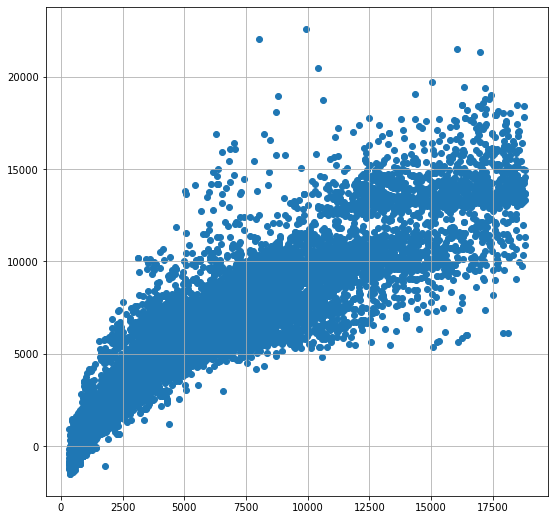

In [122]:
#scatter plot between Y(price) and Yhat. is the actuals

plt.scatter(df['price'],model_pred)
plt.grid(); 

This shows a linear relationship as the __predicted__ and __actuals__ values were very close to each other. Hence the R2 is also high

Hence __Model 6__ is the __Best Model__ said to be a very good linear regression model as its __prediction value__ is very close to the __actual value__.

### Accuracy Assesment For Base Model & Best Model (sklearn library)

The accuracy for the base & best model build using sklearn library were being checked.

#### Training Data For Base Model

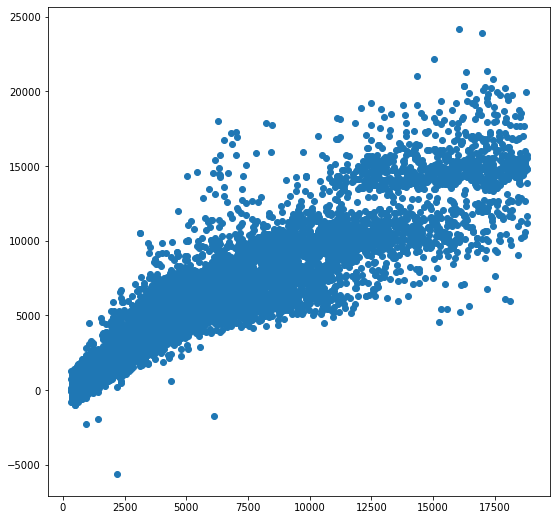

In [123]:
plt.scatter(y_train, model_base_train)

#### Testing Data For Base Model

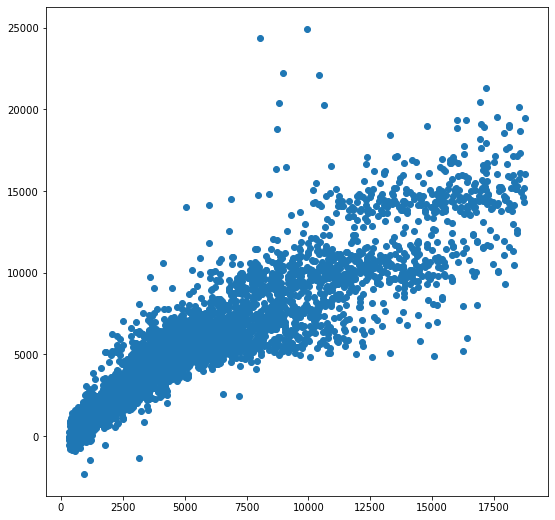

In [124]:
plt.scatter(y_test['price'], model_base_test) 

**Interpretations :**
- By comparing the train & test data scatter plot for the base model, we get to know that the many values are being predicted with moderate accuracy but there were many points in test data which did not form a linear relationship just as they build in the train data.
- The values in the test data were spreading across the plot and not predicted accurately to the train data which indicated that the prediction is not much high.
- Thus, the base model cannot be used for predicting the price of cubic zirconia.

#### Training Data For Best Model

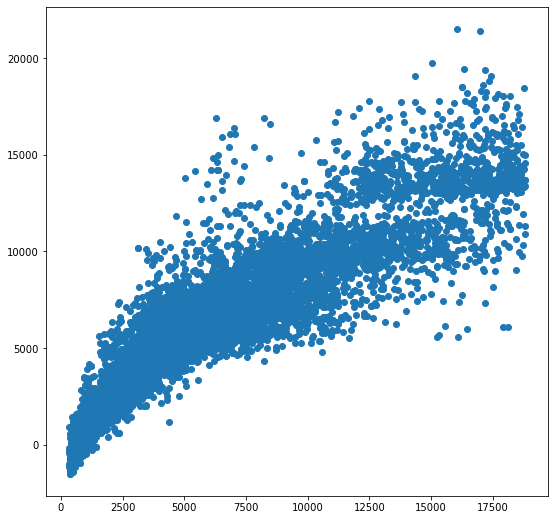

In [125]:
plt.scatter(y_train, model_sk_6_train)

#### Testing Data For Best Model

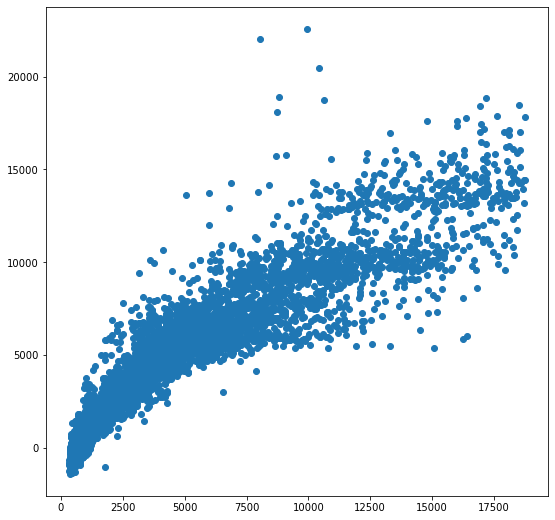

In [126]:
plt.scatter(y_test['price'], model_sk_6_test)

**Interpretations :**
- By comparing both train & test data for the __Best Model__ , we observed that the test data gives very accurate result to that of the train data. Although there were some extreme values present in the test data plot for __Best Model__ but still most of the test data was fitting correctly just like in the train data for best model.
- We inferred in the test data , many values were coming just as close to each other and in a same pattern of a positive linear relation just as in the train data except for some extreme values
- Hence, the train and test data for best model had a very good relationship. Thus, the __Best Model__ can be used for predicting the price of cubic zirconia.

**Conclusion :**
- By comparing all scatter plots for base model and best model, we inferred that many data points were close to each other in the best model and form a proper linear relationship . This indicated a better accuracy in the best model which further verifies that __Model 6__ is the __Best Model__.
- We also inferred that, test data for both base model and best model, there were some extreme values present which affect the model in very less way but majority of the portion for test data of best model were close to each oher forming a very strong relation and gives very good accurate results.

### Comparing the final model(best model) from both libraries (statsmodel & sklearn)

We shall compare it by comparing the scatter plots for both the best models and the comparison can be made out of it.

####  Scatter Plot For Best Model (statsmodel library)

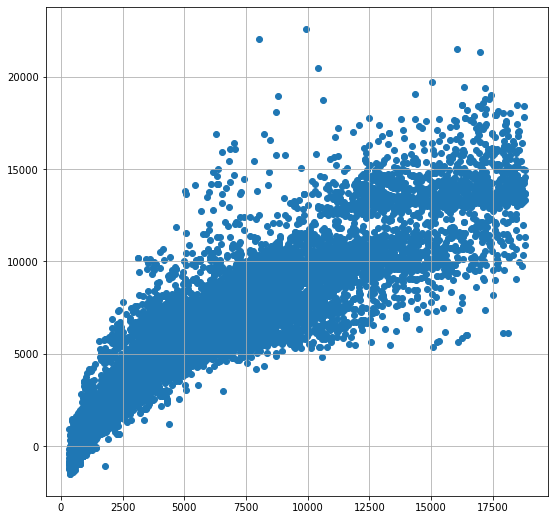

In [127]:
# This is the scatter plot between predicted values vs actual values of the data for the best model. 
plt.scatter(df['price'] ,model_pred)
plt.grid(); 

#### Scatter Plot For Best Model (sklearn library)

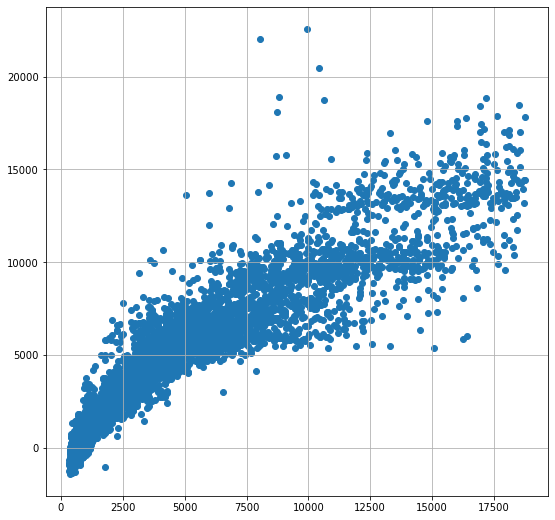

In [128]:
# This is the scatter plot between predicted values  and actual values of the test data for the best model.
plt.scatter(y_test['price'], model_sk_6_test)
plt.grid()

**Interpretations :**
- From __Best Model From Statsmodel Library___, the accuracy of the predicted values to actual values were quite good as most of the points lie very close to each other. While looking at the __Best Model From Sklearn Library__, we can say that the accuracy for the model was not that good with to __Best Model From Statsmodel Library___.
- Some values were found missing in the __Best Model From Sklearn Library__ at the top right side of the scatter plot, while as we look at the scatter plot of __Best Model From Statsmodel Library__ , many of the values were present and providing a high accuracy for the model.


**Conclusion :**
- Both of the model gave strong high postive linear relationship but still if looking the gap values and other parameters such as accuracy etc, the best model among both of them was considered __Best Model From Statsmodel Library__ as this model provided a very strong accuracy prediction which is the objective for this linear regression question.

### Highlighting the benefits of the model approach and business interpretations

## Problem 2 : Logistic Regression

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

### Problem 2.1 The very first step of any data analysis assignment is to do the exploratory data analysis (EDA). Once you have understood the nature of all the variables, especially identified the response and the predictors, apply appropriate methods to determine whether there is any duplicate observation or missing data and whether the variables have a symmetric or skewed distribution. Note that data may contain various types of attributes and numerical and/or visual data summarization techniques need to be appropriately decided. Both univariate and bivariate analyses and pre-processing of data are important. Check for outliers and comment on removing or keeping them while model building. For this is a classification problem, the dependence of the response on the predictors needs to be investigated.

### Loading The Dataset

In [129]:
data = pd.read_csv('Holiday_Package.csv')

**Data Dictionary :**

1.  Holiday_Package  :    Opted for Holiday Package yes/no?.
2.  Salary           :    Employee Salary.
3.  age              :    Age In Years.
4. edu               :    Years Of Formal Education
5. no_young_children :    The number of young children (younger than 7 years)
6. bo_older_children :    Number of older children
7. foreign           :    foreigner Yes/No

### First 5 Observations 

In [130]:
data.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


### Last 5 Observations 

In [131]:
data.tail()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


**Note :**
- By reading the dataset, we can see that 'Unnamed: 0' column is a useless column as the default index is being provided so we can remove this column.

In [132]:
data = data.drop('Unnamed: 0', axis = 1)

### Data Descriptive Statistics

In [133]:
print('Number of rows :',data.shape[0],'\nNumber of columns :',data.shape[1])

Number of rows : 872 
Number of columns : 7


### Check For Data Info & Data Types

In [134]:
print(data.info(),'\n')
print(data.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB
None 

Holliday_Package     object
Salary                int64
age                   int64
educ                  int64
no_young_children     int64
no_older_children     int64
foreign              object
dtype: object


**Interpretations :**
- The 'Unnamed: 0' column had been removed from the dataset.
- There were 5 integer data types while there were only 2 object data types.
- As per the information function, no null values were present in the dataset.

In [135]:
data.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [136]:
data.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check for null values

In [137]:
data.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

Hence, it cross confirms that there were no null values present in the data set.

### Check for Duplicate Data and drop those.

In [138]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


Number of duplicate rows = 0


Hence, there were no duplicate values across the dataset

### Check the data types of all the variables and get the unique counts of all the 'Object' type variables.

In [139]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print(feature)
        print(data[feature].value_counts())
        print('\n')

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




**Interpretations :**
- We got to know that 471 employees didn't opt for the holiday package while only 401 opted for the same.
- We also inferred that, out of 872 employees, only 216 employees were foreigners while rest of the employees were of the same nation.

### IQR

In [140]:
from pandas import Series
data_iqr = Series.to_frame(data.quantile(0.75) - data.quantile(0.25))
data_iqr

,0
Salary,18145.5
age,16.0
educ,4.0
no_young_children,0.0
no_older_children,2.0


In [141]:
data.skew()

Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

In [142]:
data.groupby(["Holliday_Package"]).count()

,Salary,age,educ,no_young_children,no_older_children,foreign
Holliday_Package,,,,,,
no,471,471,471,471,471,471
yes,401,401,401,401,401,401


### EDA 

#### Univariate Analysis

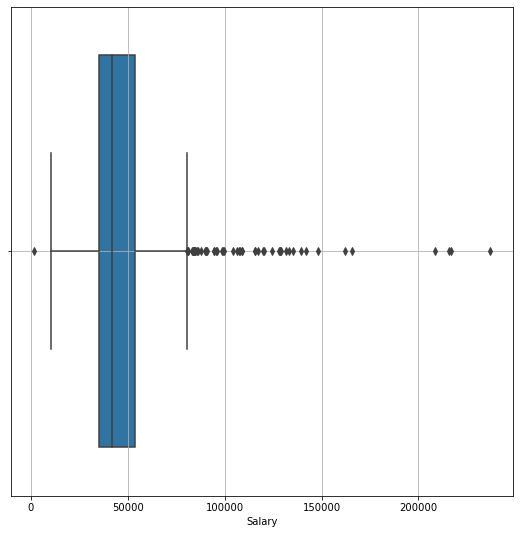

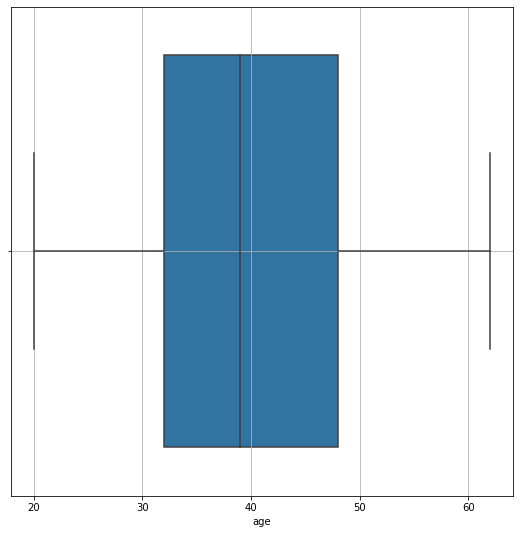

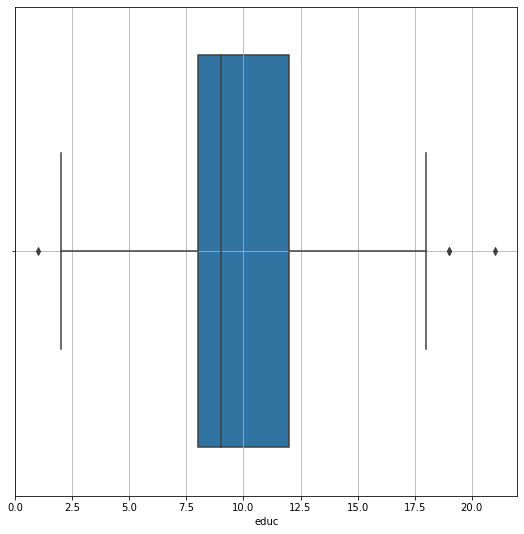

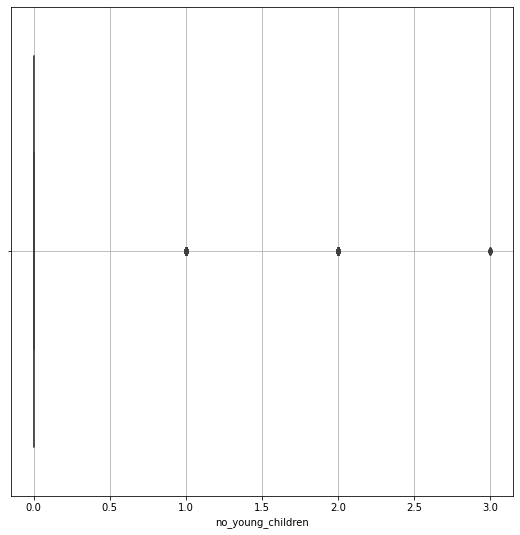

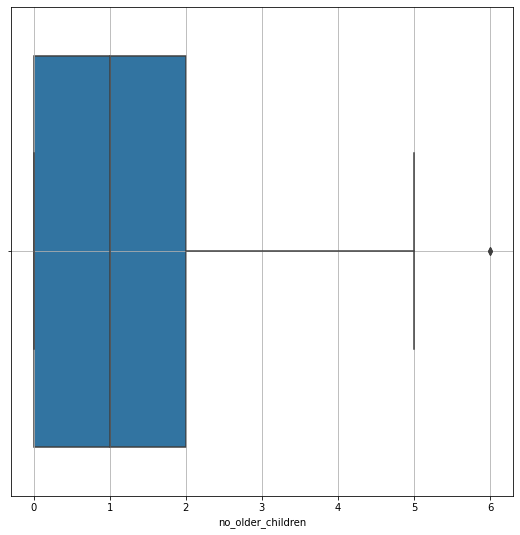

In [143]:
cols = ['Salary','age','educ','no_young_children','no_older_children']
for i in cols:
    sns.boxplot(data[i])
    plt.grid()
    plt.show();

<AxesSubplot:xlabel='foreign'>

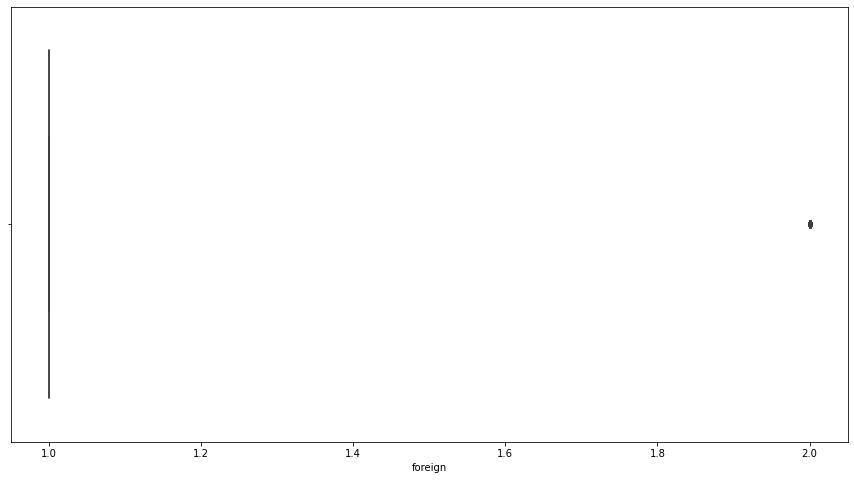

In [198]:
sns.boxplot('foreign',data=data)

In [145]:
data['no_young_children'].value_counts()

0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64

- As per the boxplot, __'no_young_children'__ had maximum no. of zero values. The value count function also tells us the exact count of no young children in the data set. 
- We should not remove this variable as it had a logical reason that some employees had children who were older or some employees had no children .


#### Should we treat outliers or not?

Logistic Regression models are not much impacted due to the presence of outliers because the sigmoid function tapers the outliers.
But due to some parameters we can make the model predictions much reliable and effective.

### Bi Variate Analysis

#### Correlation Matrix

In [146]:
corr = data.corr(method='pearson')
corr.round(4)

,Salary,age,educ,no_young_children,no_older_children
Salary,1.0000,0.0717,0.3265,-0.0297,0.1138
age,0.0717,1.0000,-0.1493,-0.5191,-0.1162
educ,0.3265,-0.1493,1.0000,0.0983,-0.0363
no_young_children,-0.0297,-0.5191,0.0983,1.0000,-0.2384
no_older_children,0.1138,-0.1162,-0.0363,-0.2384,1.0000


**Interpretations :**
- A Correlation Matrix was created above using the 'Pearson' method.
- For better understanding, a graphical representation in the form of heatmap was also created with respect to Correlation Matrix.

#### Heatmap

- A __Triangular Heatmap__  was created for the correlation matrix.
- The elements on the diagonal are the parts where categories of the same type correlate.

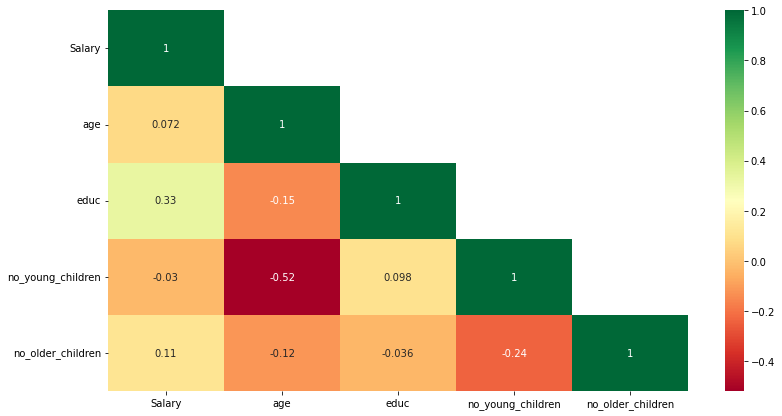

In [147]:
plt.figure(figsize=(13,7))

sns.heatmap(corr,annot=True,mask=np.triu(corr,+1),cmap='RdYlGn');

**Interpretations :**
- We inferred from the correlation matrix that, 'age' & 'no_young_children' variable had lowest relation with a correlation value of -52 %. It means that, as the age of employee increases , the no of young children gets decreased. There can be reasons for that such as ,as the age of employees increases, the age of their respective children also gets increased logically.
- We also noticed that 'educ' & 'Salary' had the maximum correlation among all the variables. This relatiohip was a postive correlation with a correlation value of 33% . It means that years of formal education plays a role in getting a higher Salary among all the other variables.
- We observed that 'no_young_children' & 'no_older_children' also had a negative correlation with a correlation value of -24 %. This meant that, they both were indirectly proportional to each other which is technically logical. As the age of young children increases, they would become older and hence the no. of young children would decrease and the no. of older children increases as per the universal fact.
- Moreover, 'age' & 'Salary' didn't had a very good correlation. They had very low relation between each other meaning they did not had a impact on each other considerably.
- Similarly, 'no_young_children' & 'Salary' and 'no_older_children' & 'Salary' also didn't had a very good correlation with each other. It means that no of young or older children didn't affect/impact the Salary of the employee.

### Multi-Variate Analysis

We created a pairplot for analysis of the dataset and finding insights from it.

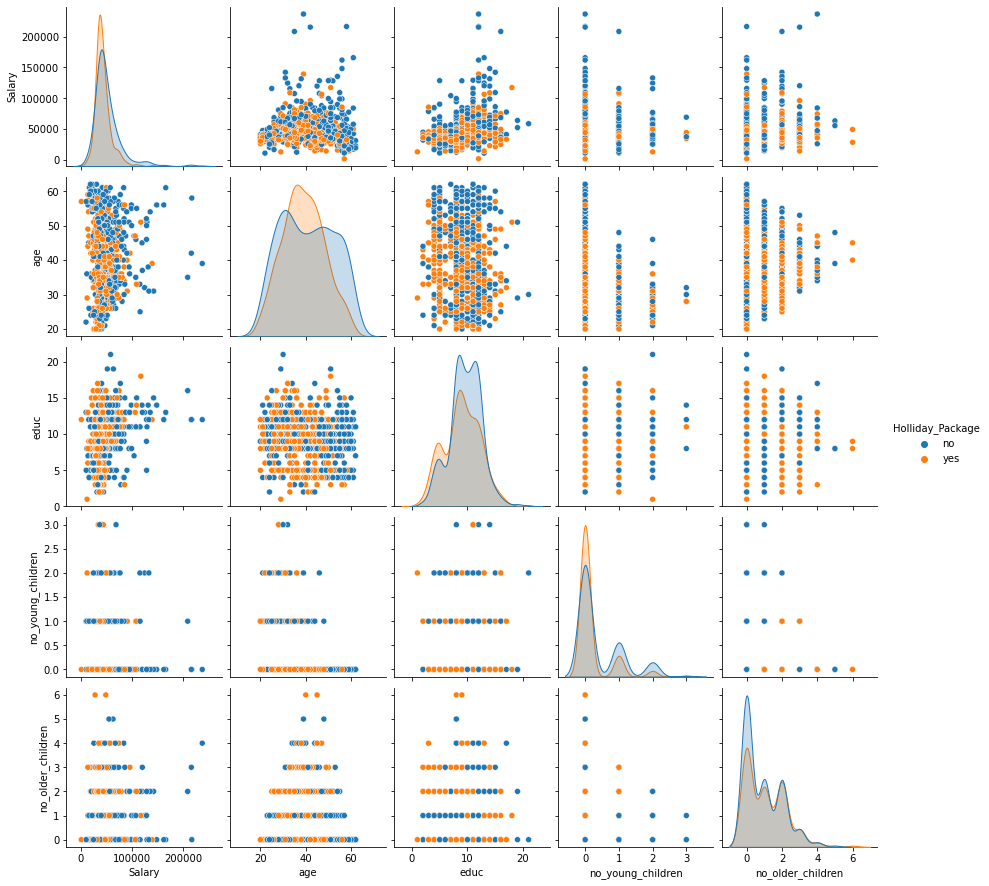

In [148]:
sns.pairplot(data , hue='Holliday_Package' ,diag_kind = 'kde')

**Interpretations :**
- As we know logistics regression is a classfication model, so we looked for the insights of the diagonal from the pairplot.
- We inferred that __'Salary'__ variable had distribution plot with __'holiday package'__ as hue in the diagonal was overalaping each other which means that this variable cannot distinguish whether the employee had opted/ not opted for the holiday package. Furthermore, the __'Salary'__ distribution plot had highest skewness and it was positively right skewed.
- Similarly, in the distribution plot with __'holiday package'__ as hue for __'no_young_children'__ and __'no_older_children'__ , the plots overlap each other indicating that these variables were also not able to predict whether an employee opted the holiday package or not. Such attributes were not considered as good attributes for classification model. Hence , they can be considered as poor predictors. These two variables were also positively right skewed while looking at the distribution plot.
- Moreover, as we looked at the __'age'__ attribute, the distribution plot were not completely overlaping but some values were surely overlaping. Also, the distribution plot with hue 'yes' had higher value than the distribution plot with hue'no'. These attributes were going to be weak predictors.
- Looking at the scatter plots, we inferred that, all the values are mostly overlapping each other with some exceptions.
- Only __'educ'__ variable turns out to be negatively left skewed as we checked the mean and median value for it.

### Transforming the object data types

- We can treat the object variables appropriately by either creating dummy variables (One-Hot Encoding) or coding it up in an ordinal manner.
- We choose ordinal manner in this case to treat 'foreign' attribute.

In [149]:
data['foreign']=np.where(data['foreign'] =='no', '1', data['foreign'])
data['foreign']=np.where(data['foreign'] =='yes', '2', data['foreign'])

In [150]:
data.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,1
1,yes,37207,45,8,0,1,1
2,no,58022,46,9,0,0,1
3,no,66503,31,11,2,0,1
4,no,66734,44,12,0,2,1


Ordinal Encoding has been done successfully in the dataset.

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


- We noticed that even after ordinal encoding, the data type of 'foreign' was still showing as object.
- So, we did convert the data type by using astype function.

In [152]:
data['foreign'] = data['foreign'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 47.8+ KB


'foreign' attritube data type was now connverted to integer successfully.

**Note :**
- Converting the 'Holliday_Package' Variable into numeric by using the LabelEncoder functionality inside sklearn.


In [153]:
## Defining a Label Encoder object instance
LE = LabelEncoder()

In [154]:
## Applying the created Label Encoder object for the target class
## Assigning the Holliday_Package 'no' as '0' and 'yes' as '1'

data['Holliday_Package'] = LE.fit_transform(data['Holliday_Package'])
data.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,1
1,1,37207,45,8,0,1,1
2,0,58022,46,9,0,0,1
3,0,66503,31,11,2,0,1
4,0,66734,44,12,0,2,1


We can see the encoding has been done successfully.

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Holliday_Package   872 non-null    int32
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int64
 5   no_older_children  872 non-null    int64
 6   foreign            872 non-null    int64
dtypes: int32(1), int64(6)
memory usage: 44.4 KB


Now, the data has been pre-processed and was now ready to build the logistic regression model.

### Problem 2.2 Use the Pre-processed Full Data to develop a logistic regression model to identify significant predictors. Check whether the proposed model is free of multicollinearity. Apply variable selection method as required. Show all intermediate models leading to the final model. Justify your choice of the final model. Which are the significant predictors?
### Compare values of model selection criteria for proposed models. Compare as many criteria as you feel are suitable.

### Logistic Regression Model

In the case of linear regression, the target variable ‘y’ is a continuous variable but let us assume that the ‘y’ is a categorical variable which has two classes then linear regression should not be used to predict the value of target variable. The output of the Linear Regression is not bound within [0,1] as it can take any real value from (−∞ ,∞). Logistic regression is used to solve such problem which gives us the corresponding probability outputs and then we can decide the appropriate cut-off points to get the target class outputs.

#### We are now building the Logistic Regression Model using all the variables on the full data and check the summary statistics of the model. Check for multicollinearity in the predictor variables using Variance Inflation Factor (VIF).

In [156]:
data.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

#### Model 1

In [157]:
formula_1='Holliday_Package ~ Salary + age + educ + no_young_children + no_older_children + foreign'

In [158]:
Logistic_1 = sm.logit(formula=formula_1,data=data).fit()

Optimization terminated successfully.
         Current function value: 0.601531
         Iterations 6


In [159]:
Logistic_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Holliday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      865
Method:                           MLE   Df Model:                            6
Date:                Sun, 17 Jul 2022   Pseudo R-squ.:                  0.1281
Time:                        14:12:58   Log-Likelihood:                -524.53
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 1.023e-30
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.0043      0.643      1.562      0.118      -0.256       2.264
Salary            -1.814e-05   4.35e-06     -4.169      0.000   -2.67e-05   -9.61e-06
age                  -0.0482      0.009     -5.314      0.000      -0.066      -0.030
educ                  0.0392      0.029      1.337      0.181      -0.018       0.097
no_young_children    -1.3173      0.180     -7.326      0.000      -1.670      -0.965
no_older_children    -0.0204      0.074     -0.276      0.782      -0.165       0.124
foreign               1.3216      0.200      6.601      0.000       0.929       1.714
=====================================================================================
"""

### Check for multicollinearity in the predictor variables using Variance Inflation Factor (VIF).

In [160]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [161]:
vif_cal(input_data=data.drop('Holliday_Package',axis=1))

Salary  VIF =  1.17
age  VIF =  1.58
educ  VIF =  1.4
no_young_children  VIF =  1.57
no_older_children  VIF =  1.19
foreign  VIF =  1.27


**Interpretations :**
- From inferential statistics, we got to know that p value for 'no_older_children','educ' was greater than 0.05 which indicated that these attributes were not significant for the logistic regression model. But only 'no_older_children' had p value = 0.782 which was very high so, this attribute should be removed and a new model shall be build.
- As per the VIF values, 'age' had the maximum VIF value with a value of 1.58 followed by 'no_young_chidren' with a VIF value of 1.57

#### 2nd Iteration Model

In [162]:
formula_2 ='Holliday_Package ~ Salary + age + educ + no_young_children + foreign'

In [163]:
Logistic_2 = sm.logit(formula=formula_2,data=data).fit()

Optimization terminated successfully.
         Current function value: 0.601574
         Iterations 6


In [164]:
Logistic_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Holliday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      866
Method:                           MLE   Df Model:                            5
Date:                Sun, 17 Jul 2022   Pseudo R-squ.:                  0.1281
Time:                        14:12:58   Log-Likelihood:                -524.57
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 1.808e-31
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.9495      0.611      1.554      0.120      -0.248       2.147
Salary            -1.831e-05   4.31e-06     -4.249      0.000   -2.68e-05   -9.86e-06
age                  -0.0474      0.009     -5.511      0.000      -0.064      -0.031
educ                  0.0399      0.029      1.367      0.172      -0.017       0.097
no_young_children    -1.3004      0.169     -7.711      0.000      -1.631      -0.970
foreign               1.3210      0.200      6.599      0.000       0.929       1.713
=====================================================================================
"""

In [165]:
vif_cal(input_data = data.drop(['Holliday_Package','no_older_children'],axis=1))

Salary  VIF =  1.14
age  VIF =  1.43
educ  VIF =  1.39
no_young_children  VIF =  1.37
foreign  VIF =  1.27


**Interpretations :**
- As we dropped the 'no_older_children' variable, the p value for 'educ' has reduced but it was still greater than 0.05. Therefore, we should 'educ' attribute and another model and check its performance.

#### 3rd Iteration Model

In [166]:
formula_3 ='Holliday_Package ~ Salary + age + no_young_children + foreign'

In [167]:
Logistic_3 = sm.logit(formula=formula_3,data=data).fit()

Optimization terminated successfully.
         Current function value: 0.602653
         Iterations 6


In [168]:
Logistic_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Holliday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      867
Method:                           MLE   Df Model:                            4
Date:                Sun, 17 Jul 2022   Pseudo R-squ.:                  0.1265
Time:                        14:12:58   Log-Likelihood:                -525.51
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 6.885e-32
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.4601      0.484      3.015      0.003       0.511       2.409
Salary            -1.664e-05   4.08e-06     -4.075      0.000   -2.46e-05   -8.64e-06
age                  -0.0495      0.008     -5.843      0.000      -0.066      -0.033
no_young_children    -1.2946      0.169     -7.669      0.000      -1.625      -0.964
foreign               1.2124      0.183      6.634      0.000       0.854       1.571
=====================================================================================
"""

In [169]:
vif_cal(input_data = data.drop(['Holliday_Package','no_older_children','educ'],axis=1))

Salary  VIF =  1.05
age  VIF =  1.38
no_young_children  VIF =  1.37
foreign  VIF =  1.05


**Interpretations :**
- Now, every variable were having p value less than 0.05 and the VIF value for every variable were good enough and in the range also.


**Conclusion :**
- As per the insights and making appropriate changes into the model, the __3rd Iteration model__ was considered to be the __Best Model__ from all the models.
- The p value, VIF value and factors of all the attributes were appropriate and this model looks pretty good model.

In [170]:
lor_model_pred = Logistic_3.fittedvalues
lor_model_pred

0     -0.911776
1     -0.172783
2     -0.568646
3     -2.556882
4     -0.614686
         ...   
867   -0.557602
868    0.975619
869   -0.310442
870    0.925492
871    0.119579
Length: 872, dtype: float64

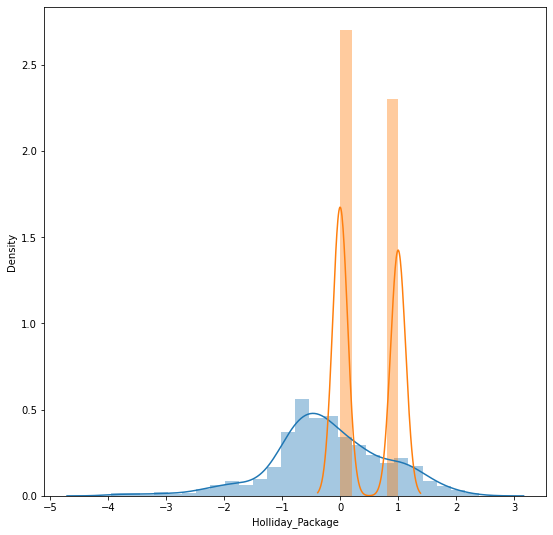

In [171]:
sns.distplot(Logistic_3.fittedvalues)
sns.distplot(data['Holliday_Package']);

## Conclusions From 3th Iteration that is Best Model

#### Holliday_Package = (Salary x -1.664e-05) + (age x -0.0495) + (no_young_children x -1.2946) + (foreign x 1.2124)

- The above equation represents the best predictors used in finding out the target variable which is 'Holliday+Package' in order to determine whether an employee opted for the Holiday Package or not.
- Hence, __Model 3__ was the best model.

### Logistic Regression Model using Sklearn Library

Apart from this, Logistic regression can also be build using the sklearn library

In [172]:
data.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [173]:
LR = LogisticRegression(solver='newton-cg',penalty='none')

In [174]:
Train,Test = train_test_split(data,test_size=0.3,random_state=1,stratify=data['Holliday_Package'])

In [175]:
Train.shape

(610, 7)

In [176]:
Test.shape

(262, 7)

In [177]:
Train['Holliday_Package'].value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package, dtype: float64

In [178]:
Test['Holliday_Package'].value_counts(1)

0    0.541985
1    0.458015
Name: Holliday_Package, dtype: float64

#### Below were the models used in the statsmodel library and then checking the accuracy score on train & test data.

### Model 1 - Building the model on the Training Data and checking the Accuracy score on the training data.

In [179]:
mod_1 = LR.fit(Train[['Salary','age','educ','no_young_children','no_older_children','foreign']],Train['Holliday_Package'])

In [180]:
print('Accuracy Score of Model 1:',mod_1.score(Train[['Salary','age','educ','no_young_children','no_older_children','foreign']],Train['Holliday_Package']))

Accuracy Score of Model 1: 0.6672131147540984


### Model 1 - Predicting the classes and the probabilities on the Test Data

In [181]:
mod_1_test_class = mod_1.predict(Test[['Salary','age','educ','no_young_children','no_older_children','foreign']])
mod_1_test_probabilities = mod_1.predict_proba(Test[['Salary','age','educ','no_young_children','no_older_children','foreign']])

### Model 2 - Building the model on the Training Data and checking the Accuracy score on the training data.

In [182]:
mod_2 = LR.fit(Train[['Salary','age','educ','no_young_children','foreign']],Train['Holliday_Package'])

In [183]:
print('Accuracy Score of Model 2:',mod_2.score(Train[['Salary','age','educ','no_young_children','foreign']],Train['Holliday_Package']))

Accuracy Score of Model 2: 0.6704918032786885


### Model 2 - Predicting the classes and the probabilities on the Test Data

In [184]:
mod_2_test_class = mod_2.predict(Test[['Salary','age','educ','no_young_children','foreign']])
mod_2_test_probabilities = mod_2.predict_proba(Test[['Salary','age','educ','no_young_children','foreign']])

### Model 3 - Building the model on the Training Data and checking the Accuracy score on the training data.

In [185]:
mod_3 = LR.fit(Train[['Salary','age','no_young_children','foreign']],Train['Holliday_Package'])

In [186]:
print('Accuracy Score of Model 3:',mod_3.score(Train[['Salary','age','no_young_children','foreign']],Train['Holliday_Package']))

Accuracy Score of Model 3: 0.659016393442623


In [188]:
mod_3_train_class = mod_3.predict(Train[['Salary','age','no_young_children','foreign']])

### Model 3 - Predicting the classes and the probabilities on the Test Data

In [189]:
mod_3_test_class = mod_3.predict(Test[['Salary','age','no_young_children','foreign']])
mod_3_test_probabilities = mod_3.predict_proba(Test[['Salary','age','no_young_children','foreign']])

### Evaluating the three models on the test data using the various statistics of the confusion matrix.

#### Confusion Matrix summary statistics Evaluation on the Test Data

In [190]:
rcParams['figure.figsize'] = 15,4

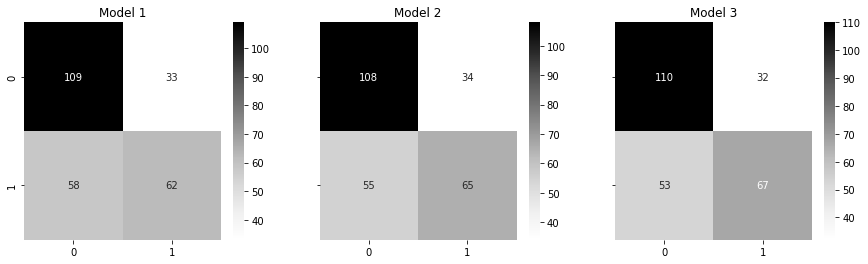

In [191]:
f,a =  plt.subplots(1,3,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Test['Holliday_Package'],mod_1_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Model 1')

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Holliday_Package'],mod_2_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Model 2');

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Holliday_Package'],mod_3_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][2]);
a[0][2].set_title('Model 3');



In [192]:
print('Model 1')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Holliday_Package'],mod_1_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('Model 2')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Holliday_Package'],mod_2_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('Model 3')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Holliday_Package'],mod_3_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

Model 1
True Negative: 109 
False Positives: 33 
False Negatives: 58 
True Positives: 62 


Model 2
True Negative: 108 
False Positives: 34 
False Negatives: 55 
True Positives: 65 


Model 3
True Negative: 110 
False Positives: 32 
False Negatives: 53 
True Positives: 67


### Classification Report Of All the Models

In [193]:
print('Model 1')
print(metrics.classification_report(Test['Holliday_Package'],mod_1_test_class),'\n')

print('Model 2')
print(metrics.classification_report(Test['Holliday_Package'],mod_2_test_class),'\n')

print('Model 3')
print(metrics.classification_report(Test['Holliday_Package'],mod_3_test_class))

Model 1
              precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.65      0.52      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262
 

Model 2
              precision    recall  f1-score   support

           0       0.66      0.76      0.71       142
           1       0.66      0.54      0.59       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.65       262
weighted avg       0.66      0.66      0.66       262
 

Model 3
              precision    recall  f1-score   support

           0       0.67      0.77      0.72       142
           1       0.68      0.56      0.61       120

    accuracy                           0.68       262
   macro avg       0.68      0.67      0.67       262
weighted avg       0.68      0.68      0.67   

**Note :** - In all models, __'0'__ represented __'No'__ to Holiday Package Opted & __'1'__ represented __'Yes'__ to Holiday Package.

**Interpretations :**
- In logistic regression, __accuracy__ is not considered as a good criteria for determining a good model. Instead , __f1-score__ is used to determine the fitness(how good the model is built) of the logistic regression model.
<br>

- From __Model 1__ , for __'0'__ ,the __precision__ and __recall__ were 0.65 & 0.77 and there __f1-score__ was 0.71 which indicates that the model is fair . While on the other hand, for __'1'__ in __Model 1__, the __precision__ and __recall__ were 0.65 & 0.52 and their respective __f1-score__ was 0.58 which indicated that the prediction for employees opting for Holiday Package was not very good. Therefore, the model can be improved by removal of poor predicators.
<br>

- From __Model 2__, for __'0'__ ,the __precision__ and __recall__ were 0.66 & 0.76 and there __f1-score__ was 0.71 which indicates that the model is fair . While on the other hand, for __'1'__ in __Model 2__, the __precision__ and __recall__ were 0.66 & 0.54 and their respective __f1-score__ was 0.59 which indicated that the prediction for employees opting for Holiday Package was not that good. Therefore, the model can be improved by removal of poor predicators.
<br>

- From __Model 3__, for __'0'__ ,the __precision__ and __recall__ were 0.67 & 0.77 and there __f1-score__ was 0.72 which indicates that the model is fair . While on the other hand, for __'1'__ in __Model 3__, the __precision__ and __recall__ were 0.68 & 0.56 and their respective __f1-score__ was 0.61 which indicated that the prediction for employees opting for Holiday Package was good.

**Conclusion :**
- __Model 3__ was now free of multicollinearity by removing the poor predictors.
- Therefore, the __Model  3__ built can be considered as the __best model__.

### Check the summary statistics of the AUC-ROC curve for all the three Logistic Regression Models built.

__AUC-ROC curve__ is a performance measurement for the classfication problems at various threshold settings.
<br>
__ROC__ is a probability curve and __AUC__ represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 & 1 classes at 1.

This was done only for the test data.

In [194]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

Model 1 AUC: 0.71684


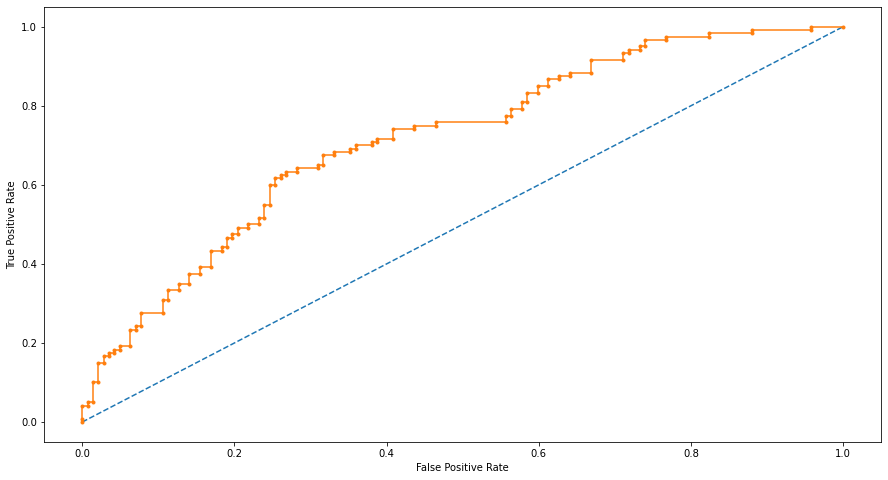

Model 2 AUC: 0.71719


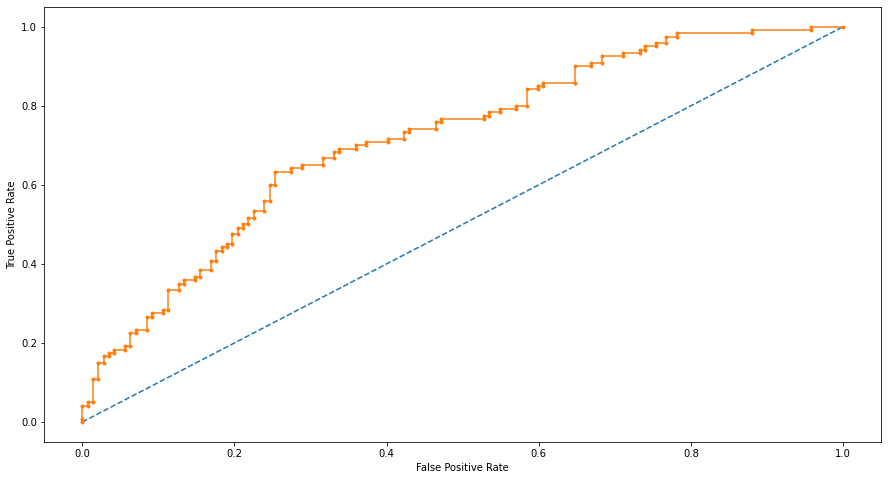

Model 3 AUC: 0.72054


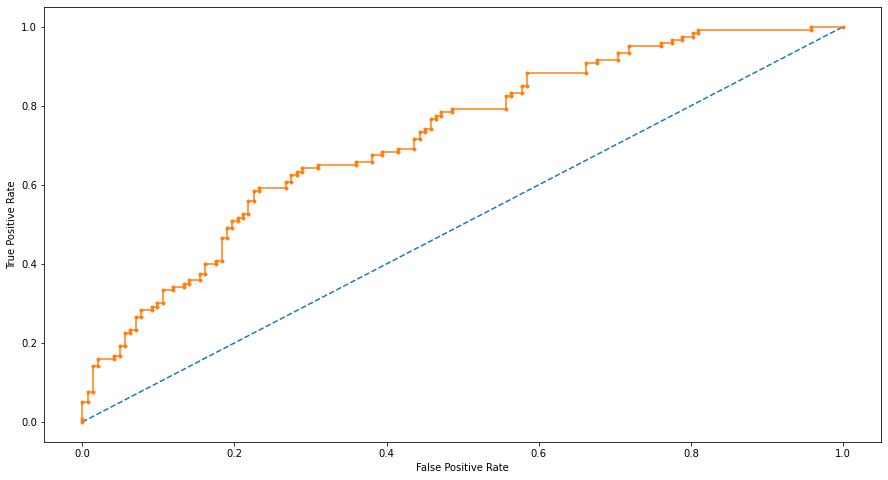

In [195]:
# AUC and ROC for the model 1


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['Holliday_Package'],mod_1_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 1 AUC: %.5f' % auc)
# # calculate roc curve
# 
fpr, tpr, thresholds = metrics.roc_curve(Test['Holliday_Package'],mod_1_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()


# AUC and ROC for the model 2


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['Holliday_Package'],mod_2_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 2 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Holliday_Package'],mod_2_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()


# AUC and ROC for the model 3


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['Holliday_Package'],mod_3_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 3 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Holliday_Package'],mod_3_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()


**Conclusion :**
- After comparing all the __ROC curve__ , __Model 3__ has the best ROC curve.
<br>

- As per the __Model 1__ & __Model 2__, the __AUC score(Area Under Curve)__ were found out to be 0.71684 & 0.71719 which were comparitively low to __Model 3__ . This indicated that the __Model 3__ was a very good model.
<br>
- As per the __Model 3__ , the __AUC score(Area Under Curve)__ was found out to be 0.72054 which was actually the highest among all the other models. It's true postive rate was greater than the other models. This indicated that the __Model 3__ was a very good model which means it has a good measure of separability.
<br>

### Compare the final best model of Part (II) and the proposed one in Part (III)

We shall use the scatter plot to compare both the best models build using statsmodel and sklearn library.

####  Scatter Plot For Best Model (statsmodel library)

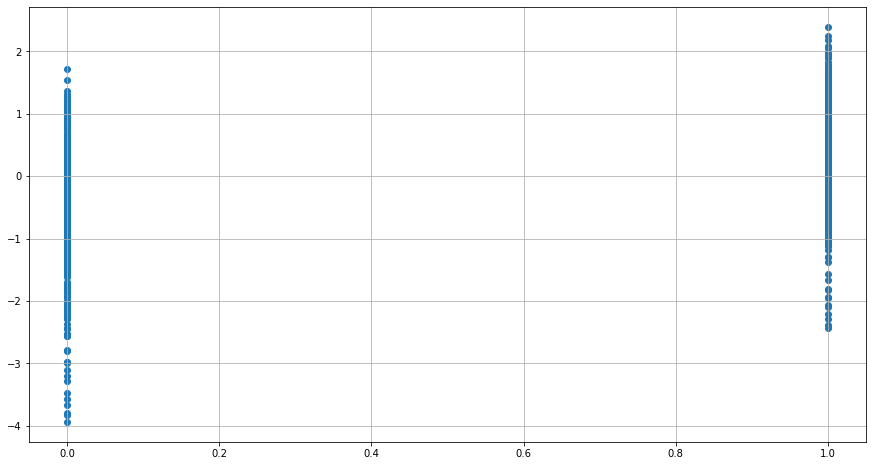

In [196]:
# This is the scatter plot between predicted values vs actual values of the data for the best model for the test data. 

plt.scatter(data['Holliday_Package'],lor_model_pred)
plt.grid();

#### Scatter Plot For Best Model (sklearn library)

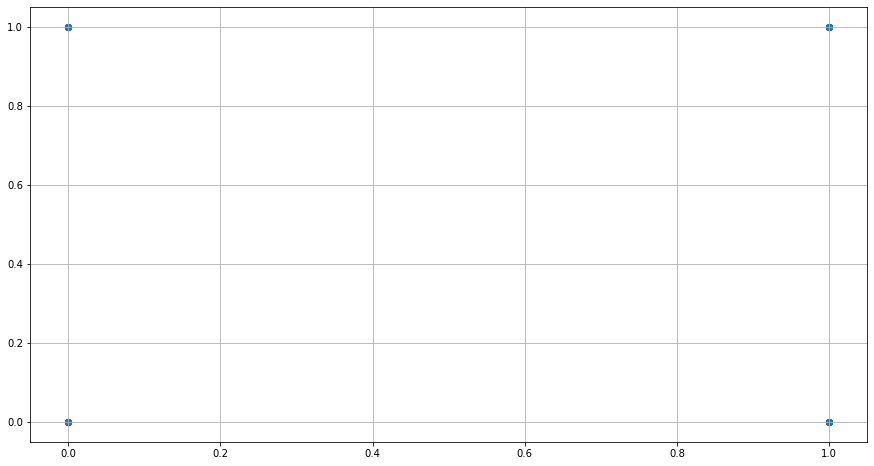

In [197]:
# This is the scatter plot between predicted values  and actual values of the test data for the best model.
plt.scatter(Test['Holliday_Package'], mod_3_test_class)
plt.grid();

### Conclusion :
- By comparing the scatte plot for both test set of the best model (statsmodel & Sklearn) , we clearly observed that the __Best Model__ from __statsmodel library__ had a good plot as compared to that of the __Best Model__ __Sklearn Library.
- __Best Model__ from __ statsmodel was a positive inclined plot while the plot of __Best Model__ from __Sklearn Library__ remained the same, as the value of x increases , the y value remained the same. 
- Hence, by looking at both the models, we concluded that __Best Model__ from __Statsmodel Library__ was the best model out of both the models. Therefore, it should be used for model predciton by the tour and travel agency.